In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
sns.set()

# 1. Import the merged data set

In [38]:
# Read the cleaned and merged data set
p0 = pd.read_csv('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/datasets/p0.csv')
p0.head(3)

,Unnamed: 0,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y
0,0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,23:58,-122.403405,37.775421
1,1,500 Block of JONES ST,36.0,ASSAULT,5.0,10.0,2017-12-31,Sunday,AGGRAVATED ASSAULT WITH A KNIFE,180000069,"(37.78627745916602, -122.41299907500884)",TENDERLOIN,"ARREST, BOOKED",20.0,23:56,-122.412999,37.786277
2,4,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,23:55,-122.421876,37.764089


In [39]:
# Remove the extra column of "Unnamed"
p0.drop('Unnamed: 0', axis=1, inplace=True)
p0.head()

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y
0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,23:58,-122.403405,37.775421
1,500 Block of JONES ST,36.0,ASSAULT,5.0,10.0,2017-12-31,Sunday,AGGRAVATED ASSAULT WITH A KNIFE,180000069,"(37.78627745916602, -122.41299907500884)",TENDERLOIN,"ARREST, BOOKED",20.0,23:56,-122.412999,37.786277
2,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,23:55,-122.421876,37.764089
3,700 Block of HARRISON ST,34.0,LARCENY/THEFT,1.0,10.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,176001461,"(37.782137249161906, -122.3978145063337)",SOUTHERN,NONE,32.0,23:50,-122.397815,37.782137
4,HEMLOCK ST / POLK ST,21.0,DRUNKENNESS,4.0,3.0,2017-12-31,Sunday,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,180000025,"(37.787280707610776, -122.42002147104692)",NORTHERN,"ARREST, BOOKED",50.0,23:46,-122.420021,37.787281


In [40]:
# Add "1" column for crime count
p0['Count'] = 1
p0.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count
0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,23:58,-122.403405,37.775421,1
1,500 Block of JONES ST,36.0,ASSAULT,5.0,10.0,2017-12-31,Sunday,AGGRAVATED ASSAULT WITH A KNIFE,180000069,"(37.78627745916602, -122.41299907500884)",TENDERLOIN,"ARREST, BOOKED",20.0,23:56,-122.412999,37.786277,1
2,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,23:55,-122.421876,37.764089,1


In [41]:
p0.shape

(1822068, 17)

In [42]:
# To see how many null values in the data set
p0.isnull().sum()

Address                          6415
Analysis Neighborhoods           7276
Category                            8
Current Police Districts         7489
Current Supervisor Districts     6940
Date                                0
DayOfWeek                           0
Descript                            0
IncidntNum                          0
Location                         6415
PdDistrict                          1
Resolution                          0
SF Find Neighborhoods           13495
Time                                0
X                                6415
Y                                6415
Count                               0
dtype: int64

In [43]:
# "SF Find Neighborhoods" column has most null values. Calculation below shows that the null values to be immaterial.
13495/1822068

0.00740641951892026

## As we can see above, the number of null values accounts for a very percentage of the data set.
# 2. Timing of San Francisco Crime Data
## 2.1 Crime count by year

In [44]:
# Change "Date column" to datetime
p0['Date'] = pd.to_datetime(p0['Date'])
p0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822068 entries, 0 to 1822067
Data columns (total 17 columns):
Address                         object
Analysis Neighborhoods          float64
Category                        object
Current Police Districts        float64
Current Supervisor Districts    float64
Date                            datetime64[ns]
DayOfWeek                       object
Descript                        object
IncidntNum                      int64
Location                        object
PdDistrict                      object
Resolution                      object
SF Find Neighborhoods           float64
Time                            object
X                               float64
Y                               float64
Count                           int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(8)
memory usage: 236.3+ MB


In [45]:
# To add year column by extracting year from "Date" column, then count number of crimes each year
per_year = p0.Date.dt.to_period('Y')
p0_year = p0.groupby(per_year).sum()
p0_year

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2003,2583316.0,581364.0,803286.0,3718046288065,6307884.0,-1.455509e+07,4.491291e+06,118892
2004,2552194.0,576286.0,790480.0,4823687390326,6225989.0,-1.435263e+07,4.429018e+06,117238
2005,2555102.0,569160.0,788980.0,5942515078032,6182141.0,-1.424470e+07,4.397596e+06,116357
2006,2565758.0,571201.0,801103.0,7174298276725,6275901.0,-1.429597e+07,4.410201e+06,116775
2007,2502558.0,552857.0,774661.0,8058907812783,5927228.0,-1.382984e+07,4.266467e+06,112968
2008,2552783.0,568034.0,786992.0,9409450286366,6037071.0,-1.415956e+07,4.368166e+06,115661
2009,2412539.0,535905.0,745888.0,9991918942043,5701526.0,-1.336357e+07,4.122615e+06,109159
2010,2235240.0,490191.0,698416.0,10373404351091,5340738.0,-1.249735e+07,3.855387e+06,102084
2011,2194602.0,494400.0,691842.0,11322129787421,5362768.0,-1.242276e+07,3.832367e+06,101474


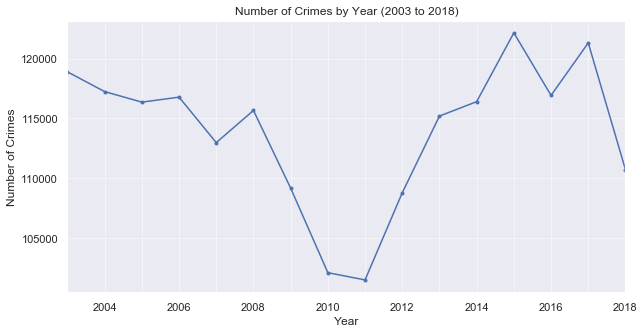

In [47]:
plt.figure(figsize=(10, 5))
p0_year['Count'].plot(marker='.')
plt.xticks(p0_year.index)
plt.title('Number of Crimes by Year (2003 to 2018)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid()
plt.grid(linestyle='-', linewidth='0.5', color='white')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/1. Number_of_Crimes_2003_2018.jpeg')
plt.show()

## The chart shows that the number of crimes starts to drop a lot in 2008, and continued till 2011 before climbing up, and peaked in 2015. The number of crimes dropped a lot in 2018, to a level similar to that in 2009.
## 2.2 Crime count by month

In [48]:
# Change "Date" into period
pd.DatetimeIndex(p0.Date).to_period("M")
per_month = p0.Date.dt.to_period("M")
per_month.head()

# To group the dataset by year_month
p0_year_month = p0.groupby(per_month).sum()
p0_year_month.head(3)

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2003-01,225777.0,50703.0,70531.0,323326525827,556622.0,-1.280787e+06,395104.838801,10462
2003-02,207801.0,46824.0,64023.0,292786300311,505309.0,-1.174525e+06,362381.703202,9594
2003-03,226437.0,52135.0,71236.0,324814492118,561128.0,-1.287284e+06,397116.769828,10515


In [49]:
# To count number of crimes by year and month
t = p0.groupby([p0.Date.dt.year, p0.Date.dt.month])\
                                            .Category.agg('count')\
                                            .rename('count_')
t.index.names = ['year', 'month']
t = t.reset_index()
t.tail(3)

,year,month,count_
189,2018,10,9602
190,2018,11,8557
191,2018,12,8953


In [50]:
# To add ym column by combining year and month column values
t['ym'] = t.year.map(str) + '-' + t.month.map(str)
t.head(3)

,year,month,count_,ym
0,2003,1,10462,2003-1
1,2003,2,9594,2003-2
2,2003,3,10515,2003-3


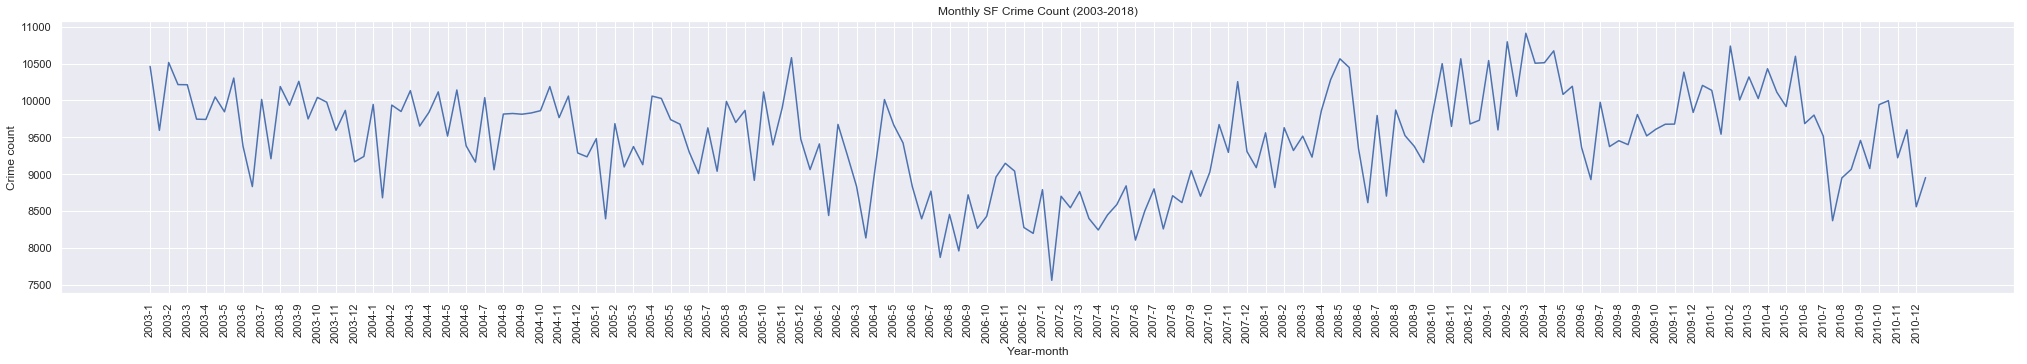

In [51]:
# Plot crime count by year_month. However, due to size of the data set, the graph was cut off at 2010-12.
fig, ax = plt.subplots(figsize=(35,5))
ax.plot(t.count_)
ax.xaxis.set_ticks(range(0, t.shape[0], 2))
_ = ax.set_xticklabels(t.ym, rotation=90)
plt.xlabel('Year-month')
plt.ylabel('Crime count')
plt.title('Monthly SF Crime Count (2003-2018)')
ax.xaxis.grid(True)
plt.show()

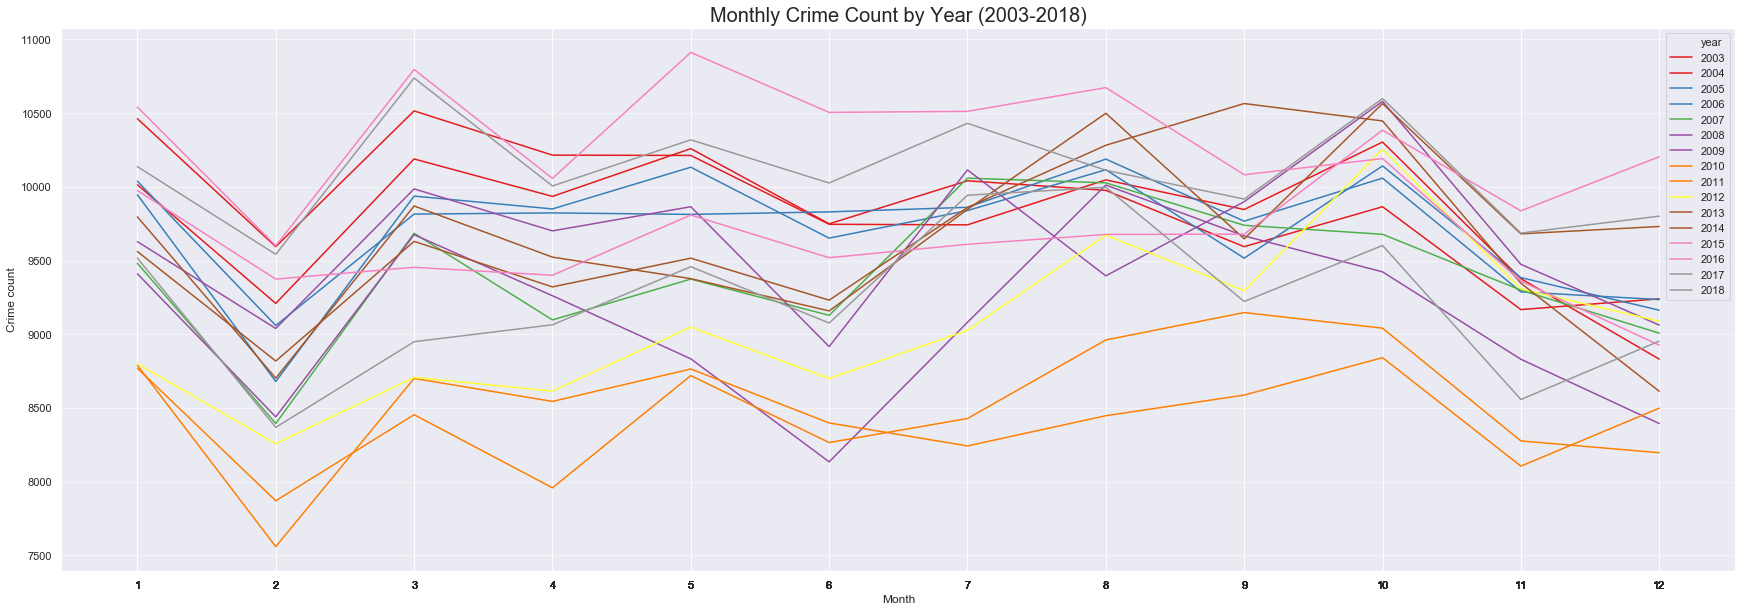

In [52]:
# To plot number of crimes by month with each year in different color
fig, ax = plt.subplots(figsize=(30,10))
sns.lineplot(x='month', y='count_', hue='year', data=t, palette='Set1', legend='full')
plt.xticks(t['month'])
plt.xlabel('Month')
plt.ylabel('Crime count')
plt.title('Monthly Crime Count by Year (2003-2018)', fontsize=20)
ax.grid(linestyle='-', linewidth='0.5', color='white')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/21. Monthly Crime Count by Year (2003-2018).jpeg')
plt.show()

In [53]:
# To count the # of crimes by month and sort the order by month
p0_month_series = pd.Series(p0.Date.dt.month.value_counts().sort_index())
p0_month_series

1     154863
2     140505
3     155102
4     150370
5     154412
6     148033
7     154638
8     158083
9     154169
10    159978
11    146973
12    144942
Name: Date, dtype: int64

In [54]:
# As there are different # of days in a month, we calculated the daily average by dividing the month total by # of days.
daysofmonth = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
p0_month_series/daysofmonth

1     4995.580645
2     5018.035714
3     5003.290323
4     5012.333333
5     4981.032258
6     4934.433333
7     4988.322581
8     5099.451613
9     5138.966667
10    5160.580645
11    4899.100000
12    4675.548387
Name: Date, dtype: float64

In [55]:
# Change Series to DataFrame
p0_month_frame = pd.DataFrame(p0_month_series)
p0_month_frame

,Date
1,154863
2,140505
3,155102
4,150370
5,154412
6,148033
7,154638
8,158083
9,154169
10,159978


In [56]:
# Add the daily average each month column to the above DataFrame
p0_month = p0_month_frame.assign(Avg = p0_month_series/daysofmonth)
p0_month

,Date,Avg
1,154863,4995.580645
2,140505,5018.035714
3,155102,5003.290323
4,150370,5012.333333
5,154412,4981.032258
6,148033,4934.433333
7,154638,4988.322581
8,158083,5099.451613
9,154169,5138.966667
10,159978,5160.580645


In [57]:
# By sorting "Date" column, Oct, Aug and Mar have most crimes. The months with least crimes are Feb, Dec and Nov. 
p0_month.sort_values(by=['Date'])

,Date,Avg
2,140505,5018.035714
12,144942,4675.548387
11,146973,4899.100000
6,148033,4934.433333
4,150370,5012.333333
9,154169,5138.966667
5,154412,4981.032258
7,154638,4988.322581
1,154863,4995.580645
3,155102,5003.290323


In [58]:
# By taking the # of days per month into consideration, we sort the DataFrame by Average.
p0_month.sort_values(by=['Avg'])

,Date,Avg
12,144942,4675.548387
11,146973,4899.100000
6,148033,4934.433333
5,154412,4981.032258
7,154638,4988.322581
1,154863,4995.580645
3,155102,5003.290323
4,150370,5012.333333
2,140505,5018.035714
8,158083,5099.451613


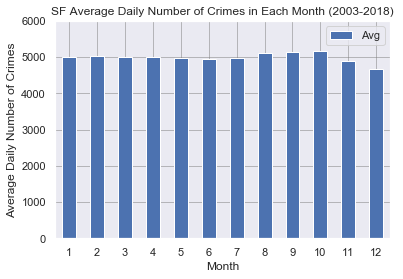

In [60]:
# To plot the daily average crime count per month
p0_month.plot(kind='bar', y='Avg')
plt.xticks(rotation='horizontal')
plt.xlabel('Month')
plt.ylabel('Average Daily Number of Crimes')
plt.title('SF Average Daily Number of Crimes in Each Month (2003-2018)')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.ylim(0, 6000)
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/2. SF Average Daily Number of Crimes in Each Month (2003-2018).jpeg')
plt.show()

## Even though the months of Oct, August and March have most crimes, there are more days in those months. Therefore, we calculated the average number of crimes each day by the number of days in that month and found that the top 3 months with most crims are Oct, Sept and August. The months with least number of crimes are Dec, Nov and June.

## 2.3 Crime count by day of the week

In [61]:
# Count the # of crimes by day of the week
p0_dayofweek = p0.DayOfWeek.value_counts()
p0_dayofweek

Friday       281015
Saturday     265328
Wednesday    265323
Thursday     260295
Tuesday      257803
Monday       251129
Sunday       241175
Name: DayOfWeek, dtype: int64

In [62]:
# Change Series into DataFrame
df_dayofweek = pd.Series(p0_dayofweek, name='Count').to_frame()
df_dayofweek

,Count
Friday,281015
Saturday,265328
Wednesday,265323
Thursday,260295
Tuesday,257803
Monday,251129
Sunday,241175


In [63]:
# Create a dictionary of the days of week
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter, range(len(sorter))))
sorterIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [64]:
# Map the days of the week to number and sort by the number
df_dayofweek['day_id']=df_dayofweek.index
df_dayofweek['day_id']=df_dayofweek['day_id'].map(sorterIndex)
df_dayofweek.sort_values('day_id', inplace=True)
df_dayofweek

,Count,day_id
Monday,251129,0
Tuesday,257803,1
Wednesday,265323,2
Thursday,260295,3
Friday,281015,4
Saturday,265328,5
Sunday,241175,6


In [65]:
# To calculate the % of crime for each day of the week
df_dayofweek_pct = df_dayofweek['Count']/np.sum(df_dayofweek['Count'])
df_dayofweek_pct

Monday       0.137826
Tuesday      0.141489
Wednesday    0.145616
Thursday     0.142857
Friday       0.154229
Saturday     0.145619
Sunday       0.132363
Name: Count, dtype: float64

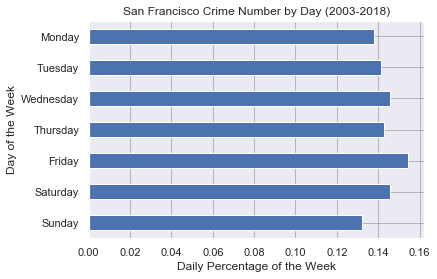

In [67]:
df_dayofweek_pct.plot('barh').invert_yaxis()
plt.title('San Francisco Crime Number by Day (2003-2018)')
plt.xlabel('Daily Percentage of the Week')
plt.ylabel('Day of the Week')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/3. San Francisco Crime Number by Day (2003-2018).jpeg', bbox_inches = "tight")

## 2.4 Crime count by hour

In [73]:
# Change "Time" column to datetime
p0['Time'] = pd.to_datetime(p0['Time'])
p0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822068 entries, 0 to 1822067
Data columns (total 18 columns):
Address                         object
Analysis Neighborhoods          float64
Category                        object
Current Police Districts        float64
Current Supervisor Districts    float64
Date                            datetime64[ns]
DayOfWeek                       object
Descript                        object
IncidntNum                      int64
Location                        object
PdDistrict                      object
Resolution                      object
SF Find Neighborhoods           float64
Time                            datetime64[ns]
X                               float64
Y                               float64
Count                           int64
hour                            int64
dtypes: datetime64[ns](2), float64(6), int64(3), object(7)
memory usage: 250.2+ MB


In [74]:
p0.head()

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,2019-12-25 23:58:00,-122.403405,37.775421,1,23
1,500 Block of JONES ST,36.0,ASSAULT,5.0,10.0,2017-12-31,Sunday,AGGRAVATED ASSAULT WITH A KNIFE,180000069,"(37.78627745916602, -122.41299907500884)",TENDERLOIN,"ARREST, BOOKED",20.0,2019-12-25 23:56:00,-122.412999,37.786277,1,23
2,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,2019-12-25 23:55:00,-122.421876,37.764089,1,23
3,700 Block of HARRISON ST,34.0,LARCENY/THEFT,1.0,10.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,176001461,"(37.782137249161906, -122.3978145063337)",SOUTHERN,NONE,32.0,2019-12-25 23:50:00,-122.397815,37.782137,1,23
4,HEMLOCK ST / POLK ST,21.0,DRUNKENNESS,4.0,3.0,2017-12-31,Sunday,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,180000025,"(37.787280707610776, -122.42002147104692)",NORTHERN,"ARREST, BOOKED",50.0,2019-12-25 23:46:00,-122.420021,37.787281,1,23


In [75]:
# Add hour column by extracting hour from "Time" column
p0['hour'] = p0['Time'].dt.hour
p0.head()

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,2019-12-25 23:58:00,-122.403405,37.775421,1,23
1,500 Block of JONES ST,36.0,ASSAULT,5.0,10.0,2017-12-31,Sunday,AGGRAVATED ASSAULT WITH A KNIFE,180000069,"(37.78627745916602, -122.41299907500884)",TENDERLOIN,"ARREST, BOOKED",20.0,2019-12-25 23:56:00,-122.412999,37.786277,1,23
2,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,2019-12-25 23:55:00,-122.421876,37.764089,1,23
3,700 Block of HARRISON ST,34.0,LARCENY/THEFT,1.0,10.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,176001461,"(37.782137249161906, -122.3978145063337)",SOUTHERN,NONE,32.0,2019-12-25 23:50:00,-122.397815,37.782137,1,23
4,HEMLOCK ST / POLK ST,21.0,DRUNKENNESS,4.0,3.0,2017-12-31,Sunday,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,180000025,"(37.787280707610776, -122.42002147104692)",NORTHERN,"ARREST, BOOKED",50.0,2019-12-25 23:46:00,-122.420021,37.787281,1,23


In [76]:
# To count the # of crimes by hour each day
p0_h = p0.groupby(['hour'],axis=0).sum()
p0_h.head()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
hour,,,,,,,,
0,2035763.0,446949.0,614480.0,9984163975301,4884101.0,-1.136175e+07,3.505463e+06,93080
1,1123595.0,243737.0,336367.0,5582754823435,2697660.0,-6.377952e+06,1.967984e+06,52253
2,937178.0,202746.0,278226.0,4493508623870,2214699.0,-5.244081e+06,1.618098e+06,42920
3,618336.0,134043.0,186310.0,2995688553975,1457579.0,-3.430537e+06,1.058396e+06,28091
4,433123.0,94207.0,132904.0,2144008394100,1043482.0,-2.431793e+06,7.502217e+05,19908


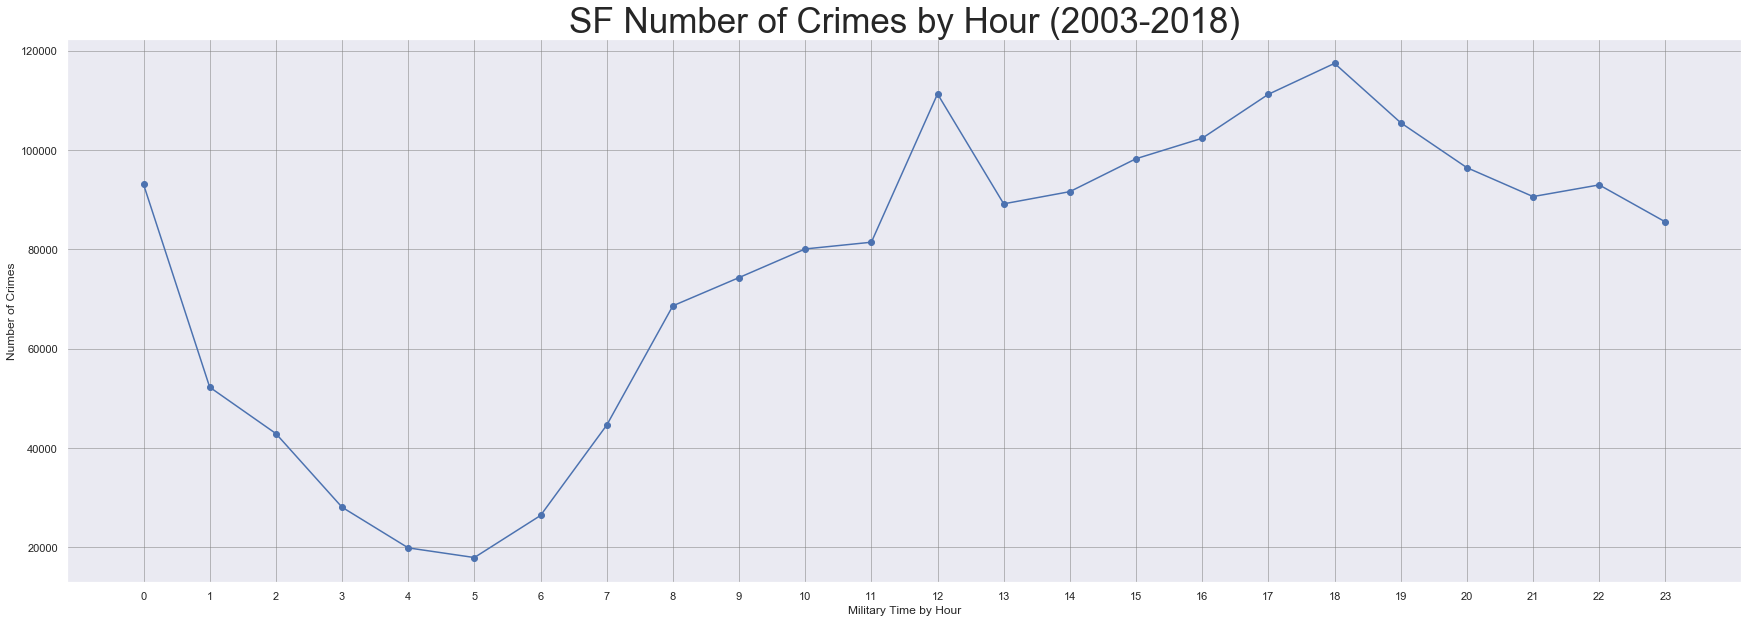

In [91]:
plt.figure(figsize=(30, 10))
plt.plot(p0_h['Count'], 'o-')
plt.xticks(p0_h.index)
plt.xlabel('Military Time by Hour')
plt.ylabel('Number of Crimes')
plt.title('SF Number of Crimes by Hour (2003-2018)', fontsize=35)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/4. SF Number of Crimes by Hour (2003-2018).jpeg')
plt.show()

## Based on the chart above, the number of crimes peaked at 12pm and 18pm each day, and remained high throughout daytime till midnight. The number of crimes was relatively low between 1am to 8am. It dropped to the lowest point at 5am.

# 3. Locations of San Francisco Crime Data
## 3.1 Crime count by PdDistrict

In [78]:
# To filter the data set by crimes happend from 2003 to 2017
p0_2017 = p0[p0['Date'].dt.year < 2018]
p0_2017.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,2019-12-25 23:58:00,-122.403405,37.775421,1,23
1,500 Block of JONES ST,36.0,ASSAULT,5.0,10.0,2017-12-31,Sunday,AGGRAVATED ASSAULT WITH A KNIFE,180000069,"(37.78627745916602, -122.41299907500884)",TENDERLOIN,"ARREST, BOOKED",20.0,2019-12-25 23:56:00,-122.412999,37.786277,1,23
2,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,2019-12-25 23:55:00,-122.421876,37.764089,1,23


In [79]:
# To filter the data set by crimes happend in 2018
p0_2018 = p0[p0['Date'].dt.year == 2018]
p0_2018.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
1711355,04TH ST \ JESSIE ST,8.0,Other Miscellaneous,5.0,10.0,2018-12-02,Sunday,"Burglary Tools, Possession Of",180908554,"(37.78490829943, -122.40479506276)",Southern,Cite or Arrest Adult,32.0,2019-12-25 00:45:00,-122.404795,37.784908,1,0
1711356,POWELL ST \ OFARRELL ST,36.0,Lost Property,6.0,3.0,2018-12-01,Saturday,Lost Property,180908112,"(37.786409612811, -122.408036237445)",Central,Open or Active,19.0,2019-12-25 20:30:00,-122.408036,37.786410,1,20
1711357,15TH ST \ SHOTWELL ST,20.0,Larceny Theft,3.0,2.0,2018-11-16,Friday,"Theft, Other Property, >$950",196076472,"(37.76687147079, -122.41654853899)",Mission,Open or Active,53.0,2019-12-25 01:34:00,-122.416549,37.766871,1,1


In [80]:
# To count the number of crimes by police districts from 2003 to 2017, sort them alphabetically, 
# then change Series to DataFrame
p0_pd_2017 = pd.DataFrame(p0_2017.PdDistrict.value_counts()).sort_index()
p0_pd_2017

,PdDistrict
BAYVIEW,167834
CENTRAL,184237
INGLESIDE,150349
MISSION,224168
NORTHERN,216305
PARK,98362
RICHMOND,93504
SOUTHERN,316257
TARAVAL,132161
TENDERLOIN,128177


In [81]:
p0_pd_2017.index

Index(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
      dtype='object')

In [82]:
# To count the number of crimes by police districts in 2018, sort them alphabetically, 
# then change Series to DataFrame
p0_pd_2018 = pd.DataFrame(p0_2018.PdDistrict.value_counts()).sort_index()
p0_pd_2018

,PdDistrict
Bayview,8614
Central,18320
Ingleside,7485
Mission,15168
Northern,14531
Out of SF,2393
Park,5351
Richmond,6324
Southern,14864
Taraval,7501


In [83]:
# Change column name of the DataFrame above
p0_pd_2018.columns = ['PdDistrict2018']
p0_pd_2018

,PdDistrict2018
Bayview,8614
Central,18320
Ingleside,7485
Mission,15168
Northern,14531
Out of SF,2393
Park,5351
Richmond,6324
Southern,14864
Taraval,7501


In [84]:
# Remove the row of "Out of SF" as it's irrelevant of our analysis
p0_pd_2018.drop('Out of SF', inplace=True)
p0_pd_2018

,PdDistrict2018
Bayview,8614
Central,18320
Ingleside,7485
Mission,15168
Northern,14531
Park,5351
Richmond,6324
Southern,14864
Taraval,7501
Tenderloin,10162


In [85]:
# To add a new column with index in capitalized letters
p0_pd_2018['new']=['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
p0_pd_2018

,PdDistrict2018,new
Bayview,8614,BAYVIEW
Central,18320,CENTRAL
Ingleside,7485,INGLESIDE
Mission,15168,MISSION
Northern,14531,NORTHERN
Park,5351,PARK
Richmond,6324,RICHMOND
Southern,14864,SOUTHERN
Taraval,7501,TARAVAL
Tenderloin,10162,TENDERLOIN


In [86]:
# Set the capitalized column as index
p0_pd_2018.set_index('new', inplace=True)
p0_pd_2018

,PdDistrict2018
new,
BAYVIEW,8614
CENTRAL,18320
INGLESIDE,7485
MISSION,15168
NORTHERN,14531
PARK,5351
RICHMOND,6324
SOUTHERN,14864
TARAVAL,7501


In [87]:
# combine 2 datasets
p0_pd = pd.concat([p0_pd_2017, p0_pd_2018], axis=1)
p0_pd

,PdDistrict,PdDistrict2018
new,,
BAYVIEW,167834,8614
CENTRAL,184237,18320
INGLESIDE,150349,7485
MISSION,224168,15168
NORTHERN,216305,14531
PARK,98362,5351
RICHMOND,93504,6324
SOUTHERN,316257,14864
TARAVAL,132161,7501


In [88]:
# To add "Total" column by adding values in 2 columns
p0_pd['Total'] = p0_pd.PdDistrict + p0_pd.PdDistrict2018
p0_pd

,PdDistrict,PdDistrict2018,Total
new,,,
BAYVIEW,167834,8614,176448
CENTRAL,184237,18320,202557
INGLESIDE,150349,7485,157834
MISSION,224168,15168,239336
NORTHERN,216305,14531,230836
PARK,98362,5351,103713
RICHMOND,93504,6324,99828
SOUTHERN,316257,14864,331121
TARAVAL,132161,7501,139662


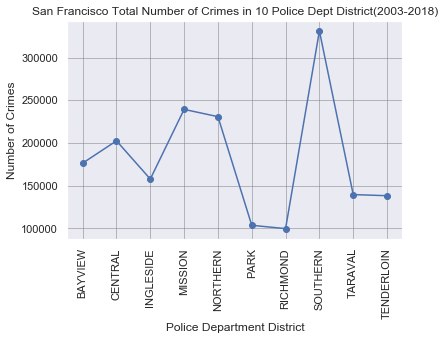

In [93]:
plt.plot(p0_pd['Total'], '-o')
plt.xticks(p0_pd.index, rotation='vertical')
plt.xlabel('Police Department District')
plt.ylabel('Number of Crimes')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.title('San Francisco Total Number of Crimes in 10 Police Dept District(2003-2018)')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/5. Number_of_Crimes_by_PdDistrict_2003_2018.jpeg', bbox_inches = "tight")
plt.show()

In [94]:
# Sort the DataFrame by "Total" column
p0_pd.sort_values(by=['Total'])

,PdDistrict,PdDistrict2018,Total
new,,,
RICHMOND,93504,6324,99828
PARK,98362,5351,103713
TENDERLOIN,128177,10162,138339
TARAVAL,132161,7501,139662
INGLESIDE,150349,7485,157834
BAYVIEW,167834,8614,176448
CENTRAL,184237,18320,202557
NORTHERN,216305,14531,230836
MISSION,224168,15168,239336


## From the above analysis and chart, there are most crimes in Southern, Mission and Northern police district. The district with least crimes are Richmond and Park. Typically, Tenderloin is considered to be the unsafest neighborhood, however, the number of crimes are relatively low compared with other neighborhoods. 

## 3.2 Crime count by address

In [95]:
# To count the # of crimes from 2003 to 2017 by address
p2017_address = p0_2017.Address.value_counts().head(10)
p2017_address

800 Block of BRYANT ST          54649
800 Block of MARKET ST          12819
1000 Block of POTRERO AV         8342
2000 Block of MISSION ST         6292
900 Block of MARKET ST           5464
0 Block of 6TH ST                4544
16TH ST / MISSION ST             4496
3200 Block of 20TH AV            4251
0 Block of TURK ST               4200
500 Block of JOHNFKENNEDY DR     3995
Name: Address, dtype: int64

In [96]:
# To change Series to DataFrame
p2017_address = pd.DataFrame(p2017_address)
p2017_address

,Address
800 Block of BRYANT ST,54649
800 Block of MARKET ST,12819
1000 Block of POTRERO AV,8342
2000 Block of MISSION ST,6292
900 Block of MARKET ST,5464
0 Block of 6TH ST,4544
16TH ST / MISSION ST,4496
3200 Block of 20TH AV,4251
0 Block of TURK ST,4200
500 Block of JOHNFKENNEDY DR,3995


In [97]:
# To add notes column
p2017_address['Notes'] = ['the 6th ST/Bryant ST in Soma', '4th ST/Market ST near Old Navy in Soma', 
                                    '1000 Potrero Ave in Mission District', '2000 Mission ST in Mission',
                                    '5th st/Market st near Westfield mall and Powell', 
                                    '6th ST/Market ST', '16th st Mission Station, same as 2000 Mission St',
                                    '3200 20th Ave at Stonestown Mall in Taraval', 
                                    'Between 5th and 6th street near Westfield Mall',
                                    'Near de Young Museum & Japanese Tea Garden']
p2017_address

,Address,Notes
800 Block of BRYANT ST,54649,the 6th ST/Bryant ST in Soma
800 Block of MARKET ST,12819,4th ST/Market ST near Old Navy in Soma
1000 Block of POTRERO AV,8342,1000 Potrero Ave in Mission District
2000 Block of MISSION ST,6292,2000 Mission ST in Mission
900 Block of MARKET ST,5464,5th st/Market st near Westfield mall and Powell
0 Block of 6TH ST,4544,6th ST/Market ST
16TH ST / MISSION ST,4496,"16th st Mission Station, same as 2000 Mission St"
3200 Block of 20TH AV,4251,3200 20th Ave at Stonestown Mall in Taraval
0 Block of TURK ST,4200,Between 5th and 6th street near Westfield Mall
500 Block of JOHNFKENNEDY DR,3995,Near de Young Museum & Japanese Tea Garden


In [98]:
# To count the # of crimes in 2018 by address as the values are in a different format
p2018_address = p0_2018.Address.value_counts().head(10)
p2018_address

MARKET ST \ POWELL ST                       840
22ND ST \ POTRERO AVE                       556
16TH ST \ MISSION ST                        533
20TH AVE \ WINSTON DR                       480
POWELL ST \ OFARRELL ST                     480
EDDY ST \ CYRIL MAGNIN ST                   423
08TH ST \ GROVE ST \ HYDE ST \ MARKET ST    405
EDDY ST \ JONES ST                          401
GEARY ST \ POWELL ST                        386
18TH ST \ CASTRO ST                         376
Name: Address, dtype: int64

In [99]:
# To change Series to DataFrame
p2018_address = pd.DataFrame(p2018_address)
p2018_address

,Address
MARKET ST \ POWELL ST,840
22ND ST \ POTRERO AVE,556
16TH ST \ MISSION ST,533
20TH AVE \ WINSTON DR,480
POWELL ST \ OFARRELL ST,480
EDDY ST \ CYRIL MAGNIN ST,423
08TH ST \ GROVE ST \ HYDE ST \ MARKET ST,405
EDDY ST \ JONES ST,401
GEARY ST \ POWELL ST,386
18TH ST \ CASTRO ST,376


In [100]:
# To add notes column
p2018_address['Note'] = ['Near Westfield Mall and Powell Station', 'Same as 1000 Potrero Ave', 
                    '16th ST Mission Statio', 'Same as Stonestown Mall', "Close to Macy's and Powell Station",
                    'Next to Powell Street Station', 'Near Civic Center Station and 8th Street in Soma',
                    '2 blocks west of Powell Station in Tenderloin', "Near Macy's and Union Square",
                    'Near the Castro Theatre and GLBT Museum']
p2018_address

,Address,Note
MARKET ST \ POWELL ST,840,Near Westfield Mall and Powell Station
22ND ST \ POTRERO AVE,556,Same as 1000 Potrero Ave
16TH ST \ MISSION ST,533,16th ST Mission Statio
20TH AVE \ WINSTON DR,480,Same as Stonestown Mall
POWELL ST \ OFARRELL ST,480,Close to Macy's and Powell Station
EDDY ST \ CYRIL MAGNIN ST,423,Next to Powell Street Station
08TH ST \ GROVE ST \ HYDE ST \ MARKET ST,405,Near Civic Center Station and 8th Street in Soma
EDDY ST \ JONES ST,401,2 blocks west of Powell Station in Tenderloin
GEARY ST \ POWELL ST,386,Near Macy's and Union Square
18TH ST \ CASTRO ST,376,Near the Castro Theatre and GLBT Museum


In [101]:
# To create a DataFrame by using the data from above 2 DataFrames
Area = ['Near WestField Mall in SOMA', 'Near 16th St Mission Station', '1000 Potrero Ave in Mission District',
        'Near Stonestown Mall in Taraval', 'Near de Young Museum at GG Park']
Total_Number_of_Crimes = [54649+12819+5464+4544+4200+840+480+423+401+386, 6292+4496+533, 8342+556, 4251+480, 3995]
address = {'Area': Area, 'Total_Number_of_Crimes': Total_Number_of_Crimes}
address = pd.DataFrame(address)
address.set_index('Area')

,Total_Number_of_Crimes
Area,
Near WestField Mall in SOMA,84206
Near 16th St Mission Station,11321
1000 Potrero Ave in Mission District,8898
Near Stonestown Mall in Taraval,4731
Near de Young Museum at GG Park,3995


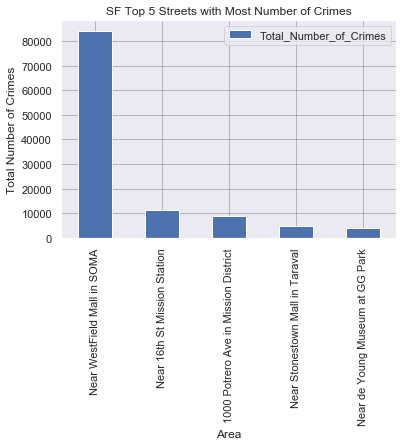

In [105]:
address.plot(kind='bar')
ax = plt.gca()
label = ['Near WestField Mall in SOMA', 'Near 16th St Mission Station', '1000 Potrero Ave in Mission District', 
          'Near Stonestown Mall in Taraval', 'Near de Young Museum at GG Park']
ax.set_xticks(address.index)
ax.set_xticklabels(label, rotation='vertical')
plt.xlabel('Area')
plt.ylabel('Total Number of Crimes')
plt.title('SF Top 5 Streets with Most Number of Crimes')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/6. SF Top 5 Streets with Most Number of Crimes.jpeg', bbox_inches = "tight")
plt.show()

## Based on the analysis above, the number of crimes near WestField Mall is way higher than other areas, followed by 16th ST Mission Station and 1000 Porero Ave, which corresponds to the PD District analysis that Southern and Mission has most crimes. The number of crimes near Stonestown Mall is also relatively high compared with others.

## 3.3 Crime count by location (longitude and latitude)

In [106]:
# To count # of crimes by location and change Series to DataFrame
p0_loc = pd.DataFrame(p0.Location.value_counts().head(10))
p0_loc

,Location
"(37.775420706711, -122.403404791479)",47547
"(37.7564864109309, -122.406539115148)",7005
"(37.775420706711, -122.40340479147905)",6780
"(37.7841893501425, -122.407633520742)",5255
"(37.7642205603745, -122.41965834371)",5039
"(37.7650501214668, -122.419671780296)",4894
"(37.7725405391593, -122.466204667893)",3872
"(37.7850629421661, -122.406520987144)",3856
"(37.7285280627465, -122.475647460786)",3367
"(37.7256933575703, -122.452289660492)",3138


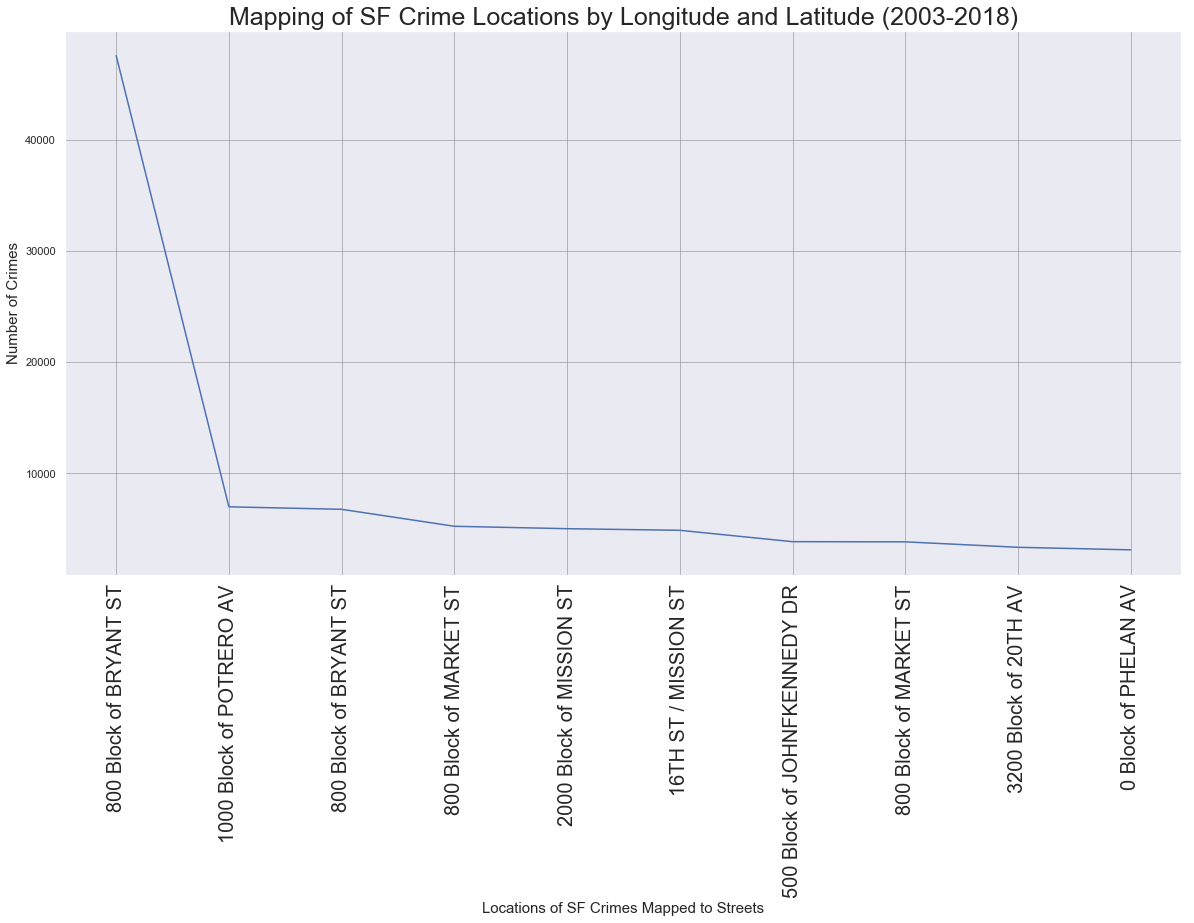

In [107]:
plt.figure(figsize=(20, 10))
plt.plot(p0_loc)
ax = plt.gca()
label1 = ['800 Block of BRYANT ST', '1000 Block of POTRERO AV', '800 Block of BRYANT ST', 
          '800 Block of MARKET ST', '2000 Block of MISSION ST', '16TH ST / MISSION ST',
          '500 Block of JOHNFKENNEDY DR', '800 Block of MARKET ST', '3200 Block of 20TH AV',
          '0 Block of PHELAN AV']
ax.set_xticks(p0_loc.index)
ax.set_xticklabels(label1, rotation='vertical', fontsize=20)
plt.xlabel('Locations of SF Crimes Mapped to Streets', fontsize=15)
plt.ylabel('Number of Crimes', fontsize=15)
plt.title('Mapping of SF Crime Locations by Longitude and Latitude (2003-2018)', fontsize=25)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/7. Mapping of SF Crime Locations by Longitude and Latitude (2003-2018).jpeg', bbox_inches = "tight")
plt.show()

## By mapping the address to longitude and latitude column, we found some different locations refer to the same street. The result shows the top 10 locations refer to SOMA area, followed by 1000 Potrero Ave in Mission, 16th st Mission Station, and Stonestown Mall, which corresponds to our address analysis.

# 4. Categories and Description of San Francisco Crime Data
## 4.1 Crime count by categories

In [434]:
# To see all diff categories in the column
p0.Category.unique()

array(['ASSAULT', 'LARCENY/THEFT', 'DRUNKENNESS', 'NON-CRIMINAL',
       'SEX OFFENSES, FORCIBLE', 'VANDALISM', 'SECONDARY CODES',
       'VEHICLE THEFT', 'SUSPICIOUS OCC', 'WEAPON LAWS', 'OTHER OFFENSES',
       'TRESPASS', 'MISSING PERSON', 'BURGLARY', 'STOLEN PROPERTY',
       'WARRANTS', 'FRAUD', 'DRUG/NARCOTIC', 'ROBBERY', 'PROSTITUTION',
       'SUICIDE', 'RECOVERED VEHICLE', 'FORGERY/COUNTERFEITING', 'ARSON',
       'BAD CHECKS', 'EMBEZZLEMENT', 'RUNAWAY', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES, NON FORCIBLE',
       'KIDNAPPING', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EXTORTION', 'LOITERING', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT',
       'TREA', 'Other Miscellaneous', 'Lost Property', 'Larceny Theft',
       'Fraud', 'Suspicious Occ', 'Recovered Vehicle', 'Burglary',
       'Non-Criminal', 'Missing Person', 'Other Offenses',
       'Malicious Mischief', 'Assault', 'Robbery',
       'Forgery And Counterfeiting', 'Miscellaneous Inv

In [108]:
# To count # of crimes by Category
p0_cat = p0.groupby('Category').sum().sort_values(by=['Count'], ascending=False)
p0_cat.head()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,hour
Category,,,,,,,,,
LARCENY/THEFT,9897388.0,2132948.0,3146927.0,50556011163893,23223910.0,-5.554485e+07,1.714002e+07,453713,6554001
OTHER OFFENSES,4237020.0,992011.0,1359046.0,20018752574353,11258543.0,-2.496717e+07,7.702895e+06,203943,2634819
NON-CRIMINAL,4460656.0,981200.0,1376261.0,21135288379823,10063934.0,-2.463626e+07,7.601177e+06,201237,2644614
ASSAULT,3329480.0,730965.0,1037777.0,14978293126436,8056457.0,-1.855877e+07,5.725370e+06,151598,1932353
VEHICLE THEFT,1907639.0,530757.0,593758.0,9052560791259,5672820.0,-1.182099e+07,3.646210e+06,96554,1426905


In [109]:
# To calculate % of crimes by Category
p0_cat['Count_pct'] = p0_cat['Count']/1822068
p0_cat.head()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,hour,Count_pct
Category,,,,,,,,,,
LARCENY/THEFT,9897388.0,2132948.0,3146927.0,50556011163893,23223910.0,-5.554485e+07,1.714002e+07,453713,6554001,0.249010
OTHER OFFENSES,4237020.0,992011.0,1359046.0,20018752574353,11258543.0,-2.496717e+07,7.702895e+06,203943,2634819,0.111929
NON-CRIMINAL,4460656.0,981200.0,1376261.0,21135288379823,10063934.0,-2.463626e+07,7.601177e+06,201237,2644614,0.110444
ASSAULT,3329480.0,730965.0,1037777.0,14978293126436,8056457.0,-1.855877e+07,5.725370e+06,151598,1932353,0.083201
VEHICLE THEFT,1907639.0,530757.0,593758.0,9052560791259,5672820.0,-1.182099e+07,3.646210e+06,96554,1426905,0.052991


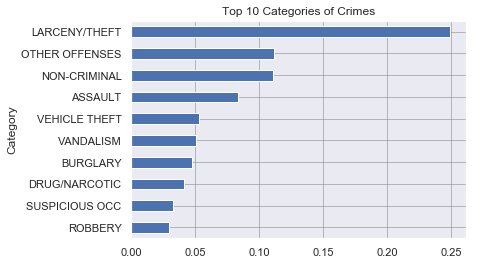

In [110]:
p0_cat['Count_pct'].head(10).plot('barh').invert_yaxis()
plt.title('Top 10 Categories of Crimes')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/8. Top 10 Categories of Crimes.jpeg', bbox_inches = "tight")

## We found that the most common types of crimes include larceny/theft, other offenses, non-criminal and assault.
## As "other offenses" and "non-criminal" are very vague, I filtered the dataframe and took a closer look at the description. Most offenses are traffic related violations. Most non-criminal cases are lost property and aided cases.

In [112]:
# To filter the DataFrame when Category is "Other offenses"
df_offense = p0[p0['Category']=='OTHER OFFENSES']
df_offense.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
37,JEFFERSON ST / POWELL ST,23.0,OTHER OFFENSES,6.0,3.0,2017-12-31,Sunday,TRAFFIC VIOLATION ARREST,171056013,"(37.80862505954667, -122.41252723968178)",CENTRAL,"ARREST, BOOKED",99.0,2019-12-25 22:26:00,-122.412527,37.808625,1,22
39,800 Block of BRYANT ST,34.0,OTHER OFFENSES,1.0,10.0,2017-12-31,Sunday,"STAY AWAY ORDER VIOLATION, DV RELATED",171055980,"(37.775420706711, -122.40340479147905)",SOUTHERN,"ARREST, BOOKED",32.0,2019-12-25 22:20:00,-122.403405,37.775421,1,22
41,800 Block of HOWARD ST,34.0,OTHER OFFENSES,1.0,10.0,2017-12-31,Sunday,FALSE REPORT OF BOMB,180009817,"(37.78232358976164, -122.40379325948861)",SOUTHERN,NONE,32.0,2019-12-25 22:01:00,-122.403793,37.782324,1,22


In [113]:
# To see what crimes are included in "Other offenses"
df_offense.Descript.value_counts().head(15)

DRIVERS LICENSE, SUSPENDED OR REVOKED                    55708
TRAFFIC VIOLATION                                        32828
LOST/STOLEN LICENSE PLATE                                15923
MISCELLANEOUS INVESTIGATION                              13991
VIOLATION OF RESTRAINING ORDER                           11390
TRAFFIC VIOLATION ARREST                                  7267
FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY            7162
RESISTING ARREST                                          6848
OBSCENE PHONE CALLS(S)                                    5089
FALSE PERSONATION                                         4211
HARASSING PHONE CALLS                                     3597
FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY     2954
VIOLATION OF MUNICIPAL CODE                               2832
PAROLE VIOLATION                                          2703
FALSE EVIDENCE OF VEHICLE REGISTRATION                    2641
Name: Descript, dtype: int64

In [114]:
# To filter the DataFrame when Category is "Non-criminal"
df_noncriminal = p0[p0['Category']=='NON-CRIMINAL']
df_noncriminal.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
5,100 Block of 3RD AV,11.0,NON-CRIMINAL,8.0,6.0,2017-12-31,Sunday,"DEATH REPORT, NATURAL CAUSES",180000940,"(37.78609571815858, -122.46134942159891)",RICHMOND,NONE,4.0,2019-12-25 23:45:00,-122.461349,37.786096,1,23
17,1200 Block of POLK ST,21.0,NON-CRIMINAL,4.0,3.0,2017-12-31,Sunday,LOST PROPERTY,180000097,"(37.788452157813204, -122.42032699386301)",NORTHERN,NONE,50.0,2019-12-25 23:00:00,-122.420327,37.788452,1,23
28,600 Block of FRANCISCO ST,23.0,NON-CRIMINAL,6.0,3.0,2017-12-31,Sunday,"STAY AWAY OR COURT ORDER, NON-DV RELATED",180006534,"(37.80447069483041, -122.41557882881042)",CENTRAL,NONE,106.0,2019-12-25 22:59:00,-122.415579,37.804471,1,22


In [115]:
# To see what crimes are included in "Non-criminal"
df_noncriminal.Descript.value_counts().head(15)

LOST PROPERTY                               72786
AIDED CASE, MENTAL DISTURBED                50422
FOUND PROPERTY                              28016
AIDED CASE                                  12380
DEATH REPORT, CAUSE UNKNOWN                 10360
AIDED CASE, DOG BITE                         3238
CIVIL SIDEWALKS, CITATION                    2844
AIDED CASE, INJURED PERSON                   2440
AIDED CASE -PROPERTY FOR DESTRUCTION         2280
DEATH REPORT, NATURAL CAUSES                 2269
CIVIL SIDEWALKS, WARNING                     2132
FIRE REPORT                                  1649
TARASOFF REPORT                              1549
PROPERTY FOR IDENTIFICATION                  1440
STAY AWAY OR COURT ORDER, NON-DV RELATED     1422
Name: Descript, dtype: int64

## 4.2 Crime count by resolution

In [116]:
# To count # of crimes by Resolution
p0_res = p0.Resolution.value_counts().head(10)
p0_res

NONE                    1194921
ARREST, BOOKED           274879
ARREST, CITED            135465
Open or Active            92878
PSYCHOPATHIC CASE         26749
LOCATED                   24197
UNFOUNDED                 17836
Cite or Arrest Adult      16608
JUVENILE BOOKED            6864
NOT PROSECUTED             6534
Name: Resolution, dtype: int64

In [117]:
# To calculate the % of crimes by Resolution
p0_res_pct = p0.Resolution.value_counts(normalize=True).head(10)
p0_res_pct

NONE                    0.655805
ARREST, BOOKED          0.150861
ARREST, CITED           0.074347
Open or Active          0.050974
PSYCHOPATHIC CASE       0.014681
LOCATED                 0.013280
UNFOUNDED               0.009789
Cite or Arrest Adult    0.009115
JUVENILE BOOKED         0.003767
NOT PROSECUTED          0.003586
Name: Resolution, dtype: float64

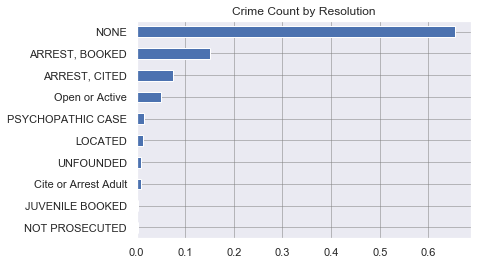

In [118]:
p0_res_pct.plot('barh').invert_yaxis()
plt.title('Crime Count by Resolution')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/9. Crime Count by Resolution.jpeg', bbox_inches = "tight")

## The above chart showed that the resolution of over 65% of crimes is 'None', which means police appeared at the crime scene and recorded it, but didn't take action. 22% of crimes leads to arrests, either booked or cited. "Booking" after an arrest is a procedure that police perform, which includes taking the criminal suspect's personal information, recording information about the alleged crime, doing record search of the suspect's criminal background, fingerprinting, taking mug shots etc. A citation is a written notice issued for a misdemeaner, such as a traffic ticket.
## As the number of crimes whose resolution is NONE accounts for a majority of incidents, we would want to see what type of crimes usually lead to no action.

In [119]:
# To filter the data set when Resolution is None.
df_res = p0[p0['Resolution']=='NONE']
df_res.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
0,800 Block of BRYANT ST,34.0,ASSAULT,1.0,10.0,2017-12-31,Sunday,BATTERY,180000417,"(37.775420706711, -122.40340479147905)",SOUTHERN,NONE,32.0,2019-12-25 23:58:00,-122.403405,37.775421,1,23
2,500 Block of VALENCIA ST,20.0,LARCENY/THEFT,3.0,5.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,186005077,"(37.76408889445322, -122.42187648849193)",MISSION,NONE,37.0,2019-12-25 23:55:00,-122.421876,37.764089,1,23
3,700 Block of HARRISON ST,34.0,LARCENY/THEFT,1.0,10.0,2017-12-31,Sunday,PETTY THEFT OF PROPERTY,176001461,"(37.782137249161906, -122.3978145063337)",SOUTHERN,NONE,32.0,2019-12-25 23:50:00,-122.397815,37.782137,1,23


In [120]:
# To count the # of crimes by Category when Resolution is None
df_res_count = df_res.Category.value_counts().head(10)
df_res_count

LARCENY/THEFT     415752
NON-CRIMINAL      164368
ASSAULT            93333
VEHICLE THEFT      89028
VANDALISM          86063
BURGLARY           73519
OTHER OFFENSES     70083
SUSPICIOUS OCC     54605
ROBBERY            41600
FRAUD              19664
Name: Category, dtype: int64

In [121]:
# To calculate the # of crimes by Category when Resolution is None
df_res_pct = df_res.Category.value_counts(normalize=True).head(10)
df_res_pct

LARCENY/THEFT     0.347933
NON-CRIMINAL      0.137556
ASSAULT           0.078108
VEHICLE THEFT     0.074505
VANDALISM         0.072024
BURGLARY          0.061526
OTHER OFFENSES    0.058651
SUSPICIOUS OCC    0.045698
ROBBERY           0.034814
FRAUD             0.016456
Name: Category, dtype: float64

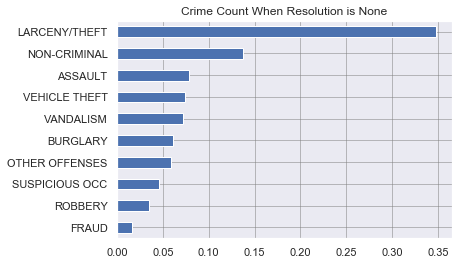

In [123]:
df_res_pct.plot('barh').invert_yaxis()
plt.title('Crime Count When Resolution is None')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/10. Crime Count When Resolution is None.jpeg', bbox_inches = "tight")

## Based on the chart above, we can see most of the crimes that no action was taken are theft, non-criminal offenses, followed by assault, and vandalism. Vehicle theft is very common. Therefore it's not combined with larceny/theft.

In [124]:
# To count the # of crimes when Category is Non-criminal and when Resolution is None
df_res_noncrim = df_res[df_res['Category']=='NON-CRIMINAL']
df_res_noncrim.head(3)

,Address,Analysis Neighborhoods,Category,Current Police Districts,Current Supervisor Districts,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,Resolution,SF Find Neighborhoods,Time,X,Y,Count,hour
5,100 Block of 3RD AV,11.0,NON-CRIMINAL,8.0,6.0,2017-12-31,Sunday,"DEATH REPORT, NATURAL CAUSES",180000940,"(37.78609571815858, -122.46134942159891)",RICHMOND,NONE,4.0,2019-12-25 23:45:00,-122.461349,37.786096,1,23
17,1200 Block of POLK ST,21.0,NON-CRIMINAL,4.0,3.0,2017-12-31,Sunday,LOST PROPERTY,180000097,"(37.788452157813204, -122.42032699386301)",NORTHERN,NONE,50.0,2019-12-25 23:00:00,-122.420327,37.788452,1,23
28,600 Block of FRANCISCO ST,23.0,NON-CRIMINAL,6.0,3.0,2017-12-31,Sunday,"STAY AWAY OR COURT ORDER, NON-DV RELATED",180006534,"(37.80447069483041, -122.41557882881042)",CENTRAL,NONE,106.0,2019-12-25 22:59:00,-122.415579,37.804471,1,22


In [125]:
# To see details of the types of crimes
df_res_noncrim.Descript.value_counts().head(10)

LOST PROPERTY                           72199
AIDED CASE, MENTAL DISTURBED            24982
FOUND PROPERTY                          24510
AIDED CASE                              10887
DEATH REPORT, CAUSE UNKNOWN             10135
AIDED CASE, DOG BITE                     2660
AIDED CASE, INJURED PERSON               2312
DEATH REPORT, NATURAL CAUSES             2221
AIDED CASE -PROPERTY FOR DESTRUCTION     2219
CIVIL SIDEWALKS, WARNING                 1984
Name: Descript, dtype: int64

## 4.3 Crime Count by Description

In [126]:
# To count # of crimes by description
df_des = p0.Descript.value_counts().head(25)
df_des

GRAND THEFT FROM LOCKED AUTO                 171079
LOST PROPERTY                                 72786
BATTERY                                       62713
STOLEN AUTOMOBILE                             60942
DRIVERS LICENSE, SUSPENDED OR REVOKED         55708
AIDED CASE, MENTAL DISTURBED                  50422
PETTY THEFT FROM LOCKED AUTO                  49863
PETTY THEFT OF PROPERTY                       43599
SUSPICIOUS OCCURRENCE                         41352
MALICIOUS MISCHIEF, VANDALISM                 36526
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     35771
TRAFFIC VIOLATION                             32828
FOUND PROPERTY                                28016
GRAND THEFT OF PROPERTY                       27648
PETTY THEFT FROM A BUILDING                   24307
PETTY THEFT SHOPLIFTING                       23121
GRAND THEFT FROM A BUILDING                   21354
WARRANT ARREST                                19478
THREATS AGAINST LIFE                          19269
MISSING ADUL

In [127]:
# To calculate % of crimes by description
df_des_pct = p0.Descript.value_counts(normalize=True).head(25)
df_des_pct

GRAND THEFT FROM LOCKED AUTO                 0.093893
LOST PROPERTY                                0.039947
BATTERY                                      0.034419
STOLEN AUTOMOBILE                            0.033447
DRIVERS LICENSE, SUSPENDED OR REVOKED        0.030574
AIDED CASE, MENTAL DISTURBED                 0.027673
PETTY THEFT FROM LOCKED AUTO                 0.027366
PETTY THEFT OF PROPERTY                      0.023928
SUSPICIOUS OCCURRENCE                        0.022695
MALICIOUS MISCHIEF, VANDALISM                0.020046
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    0.019632
TRAFFIC VIOLATION                            0.018017
FOUND PROPERTY                               0.015376
GRAND THEFT OF PROPERTY                      0.015174
PETTY THEFT FROM A BUILDING                  0.013340
PETTY THEFT SHOPLIFTING                      0.012689
GRAND THEFT FROM A BUILDING                  0.011720
WARRANT ARREST                               0.010690
THREATS AGAINST LIFE        

In [128]:
# The top 25 types of crimes account for 54.1% of the data set
np.sum(df_des_pct)

0.5407558883642104

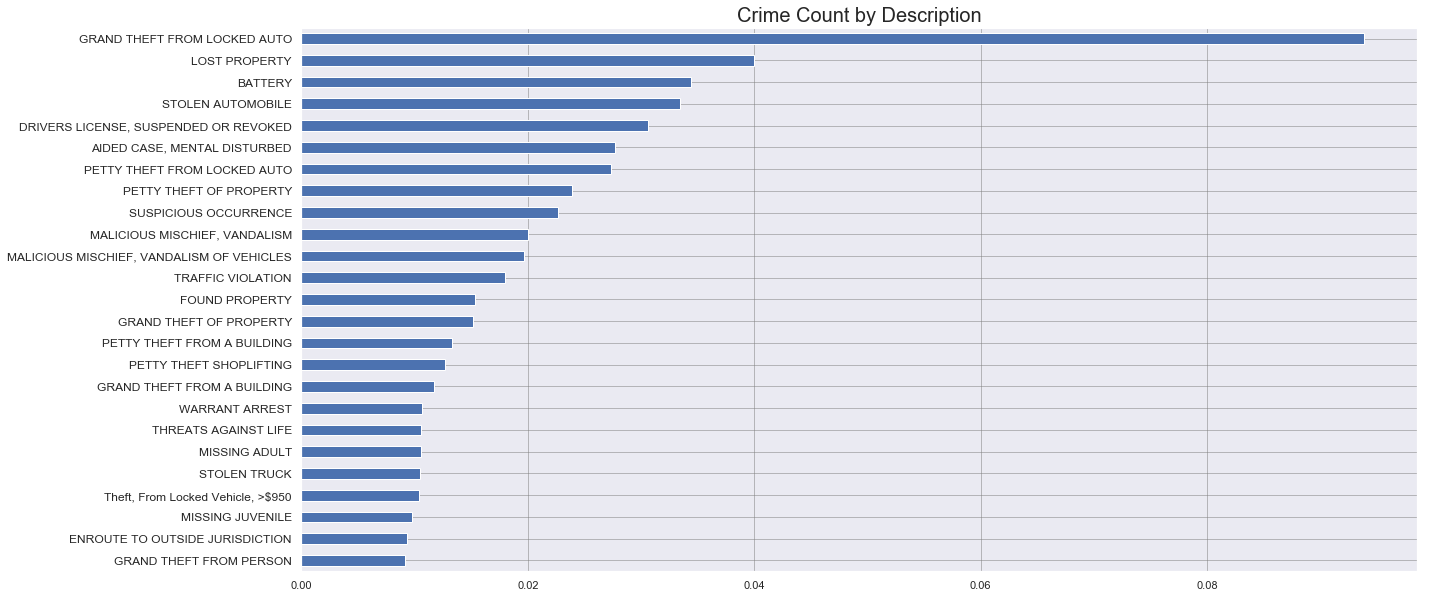

In [129]:
plt.figure(figsize=(20, 10))
df_des_pct.plot('barh').invert_yaxis()
plt.title('Crime Count by Description', fontsize=20)
plt.yticks(size = 12)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/11. Crime Count by Description.jpeg', bbox_inches = "tight")

## The top 25 description accounts for over 50% of the crimes. We can see from the chart the top 5 are mostly vehicle related, including grand theft from locked auto, stolen automobile and suspension & revocation of driver's licenses. Others include lost property and battery.
## An overview of the bar chart above, we can see theft from locked vehicle, theft of property, traffic violation, stolen vehicles, battery, vadalism are generally common.
# 5. San Francisco Crime Data & Other Data Sets
## 5.1 SF Crime Count and Temperature from 2014 to 2018
### Weather Datasets: We found daily temperature in CA from 2014 to 2018. We will use the average temperature column 'TAVG' for analysis. Dateset source: https://www.ncdc.noaa.gov/cdo-web/search

In [130]:
temp = pd.read_csv('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/datasets/other/Temprature2014_2018.csv')
temp.head(3)

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS,WT01,WT02,WT03,WT05,WT08,WT09,WT11
0,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# To see the locations of weather centers
temp['NAME'].unique()

array(['BERKELEY 0.9 SSE, CA US', 'SPRING VALLEY CALIFORNIA, CA US',
       'PALO ALTO 1.2 NE, CA US', 'AMERICAN CANYON 3.5 NE, CA US',
       'HALF MOON BAY, CA US', 'NEWARK, CA US', 'MUIR WOODS, CA US',
       'AMERICAN CANYON 0.3 S, CA US', 'BLACK DIAMOND CALIFORNIA, CA US',
       'WOODSIDE FIRE STATION 1, CA US', 'EAST PALO ALTO 0.3 WSW, CA US',
       'SAN MATEO 0.8 NE, CA US', 'PACIFICA 1.9 S, CA US',
       'LAFAYETTE 0.7 E, CA US', 'SAN FRANCISCO OCEANSIDE, CA US',
       'WALNUT CREEK 1.7 SSE, CA US', 'MARTINEZ 0.8 SSE, CA US',
       'SAN RAFAEL CIVIC CEN, CA US', 'BERKELEY, CA US',
       'BRIONES CALIFORNIA, CA US', 'SAN FRANCISCO DOWNTOWN, CA US',
       'MARTINEZ 2.2 SW, CA US', 'BARNABY CALIFORNIA, CA US',
       'LAFAYETTE 1.9 WSW, CA US', 'OAKLAND NORTH CALIFORNIA, CA US',
       'WOODSIDE 3.4 S, CA US', 'OAKLAND SOUTH CALIFORNIA, CA US',
       'REDWOOD CITY 3.3 SSW, CA US', 'WALNUT CREEK 1.4 NE, CA US',
       'WALNUT CREEK 1.4 SSE, CA US', 'SAN RAFAEL 3.7 WNW, CA U

By observing the name of the weather center, I selected the area of 'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US' for analysis.

In [132]:
# To keep 3 columns of the original data set
df_temp = temp.loc[[i for i in range(len(temp))], ['NAME', 'DATE', 'TAVG']]
df_temp.head(3)

,NAME,DATE,TAVG
0,"BERKELEY 0.9 SSE, CA US",2017-07-01,NaN
1,"BERKELEY 0.9 SSE, CA US",2017-07-02,NaN
2,"BERKELEY 0.9 SSE, CA US",2017-07-03,NaN


In [133]:
# To filter the data set by "San Francisco International Airport"
sf_temp = df_temp[df_temp['NAME']=='SAN FRANCISCO INTERNATIONAL AIRPORT, CA US']
sf_temp.head()

,NAME,DATE,TAVG
125654,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-01,49.0
125655,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-02,51.0
125656,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-03,52.0
125657,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-04,53.0
125658,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-05,55.0


In [134]:
# To change "DATE" column to datetime
sf_temp['DATE'] = pd.to_datetime(sf_temp['DATE'])
sf_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 125654 to 127479
Data columns (total 3 columns):
NAME    1826 non-null object
DATE    1826 non-null datetime64[ns]
TAVG    1826 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 57.1+ KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
# To set DATE column as index
sf_temp.set_index('DATE', inplace=True)
sf_temp.head()

,NAME,TAVG
DATE,,
2014-01-01,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",49.0
2014-01-02,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",51.0
2014-01-03,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",52.0
2014-01-04,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",53.0
2014-01-05,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",55.0


In [136]:
# To calculate the annual average temperature
sf_temp_year = sf_temp.resample('Y').mean()
sf_temp_year

,TAVG
DATE,
2014-12-31,60.789041
2015-12-31,59.202740
2016-12-31,58.653005
2017-12-31,58.805479
2018-12-31,58.013699


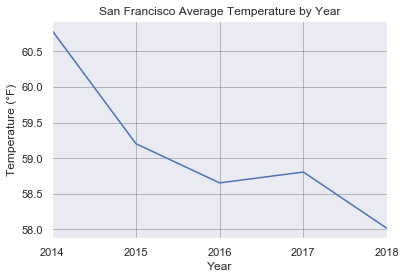

In [137]:
sf_temp_year['TAVG'].plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.title('San Francisco Average Temperature by Year')
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/12. San Francisco Average Temperature by Year.jpeg', bbox_inches = "tight")
plt.show()

In [138]:
# To calculate the average monthly temperature
sf_temp_month = sf_temp.resample('M').mean()
sf_temp_month.head(3)

,TAVG
DATE,
2014-01-31,54.193548
2014-02-28,54.035714
2014-03-31,57.870968


In [139]:
# To add a column by extracting year from "DATE" column
sf_temp_month['year'] = pd.DatetimeIndex(sf_temp_month.index).year
sf_temp_month.head(2)

,TAVG,year
DATE,,
2014-01-31,54.193548,2014
2014-02-28,54.035714,2014


In [140]:
# To add a column by extracting month from "DATE" column
sf_temp_month['month'] = pd.DatetimeIndex(sf_temp_month.index).month
sf_temp_month.head(2)

,TAVG,year,month
DATE,,,
2014-01-31,54.193548,2014,1
2014-02-28,54.035714,2014,2


In [141]:
# To create year_month column by combining the 2 columns
sf_temp_month['year_month'] = pd.to_datetime(sf_temp_month.index).to_period('M')
sf_temp_month.head(2)

,TAVG,year,month,year_month
DATE,,,,
2014-01-31,54.193548,2014,1,2014-01
2014-02-28,54.035714,2014,2,2014-02


In [142]:
# To set year_month as index
sf_temp_index = sf_temp_month.set_index('year_month')
sf_temp_index.head(3)

,TAVG,year,month
year_month,,,
2014-01,54.193548,2014,1
2014-02,54.035714,2014,2
2014-03,57.870968,2014,3


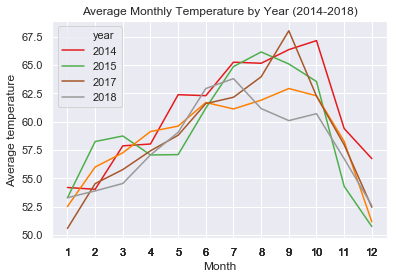

In [143]:
sns.lineplot(x='month', y='TAVG', hue='year', data=sf_temp_index, palette='Set1')
plt.xticks(sf_temp_index.month)
plt.xlabel('Month')
plt.ylabel('Average temperature')
plt.title('Average Monthly Temperature by Year (2014-2018)')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/22. Average Monthly Temperature by Year (2014-2018).jpeg')
plt.show()

In [144]:
p0_year.head()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2003,2583316.0,581364.0,803286.0,3718046288065,6307884.0,-1.455509e+07,4.491291e+06,118892
2004,2552194.0,576286.0,790480.0,4823687390326,6225989.0,-1.435263e+07,4.429018e+06,117238
2005,2555102.0,569160.0,788980.0,5942515078032,6182141.0,-1.424470e+07,4.397596e+06,116357
2006,2565758.0,571201.0,801103.0,7174298276725,6275901.0,-1.429597e+07,4.410201e+06,116775
2007,2502558.0,552857.0,774661.0,8058907812783,5927228.0,-1.382984e+07,4.266467e+06,112968


In [145]:
p0_year_month.head()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2003-01,225777.0,50703.0,70531.0,323326525827,556622.0,-1.280787e+06,395104.838801,10462
2003-02,207801.0,46824.0,64023.0,292786300311,505309.0,-1.174525e+06,362381.703202,9594
2003-03,226437.0,52135.0,71236.0,324814492118,561128.0,-1.287284e+06,397116.769828,10515
2003-04,222751.0,49910.0,69588.0,316291103310,535302.0,-1.250550e+06,385889.944811,10215
2003-05,221246.0,49746.0,69252.0,316347573418,535043.0,-1.250303e+06,385764.990817,10213


In [146]:
# To filter our crime data set from 2014 to 2018
p0_year_month_2014 = p0_year_month.loc[p0_year_month.index > '2013-12']
p0_year_month_2014.head(3)

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2014-01,205923.0,47695.0,66491.0,1383280061209,506553.0,-1.199261e+06,369977.807458,9796
2014-02,181951.0,42487.0,59236.0,1228663334251,449730.0,-1.065327e+06,328657.820175,8702
2014-03,208161.0,48176.0,66939.0,1400935264105,508991.0,-1.208321e+06,372773.519194,9870


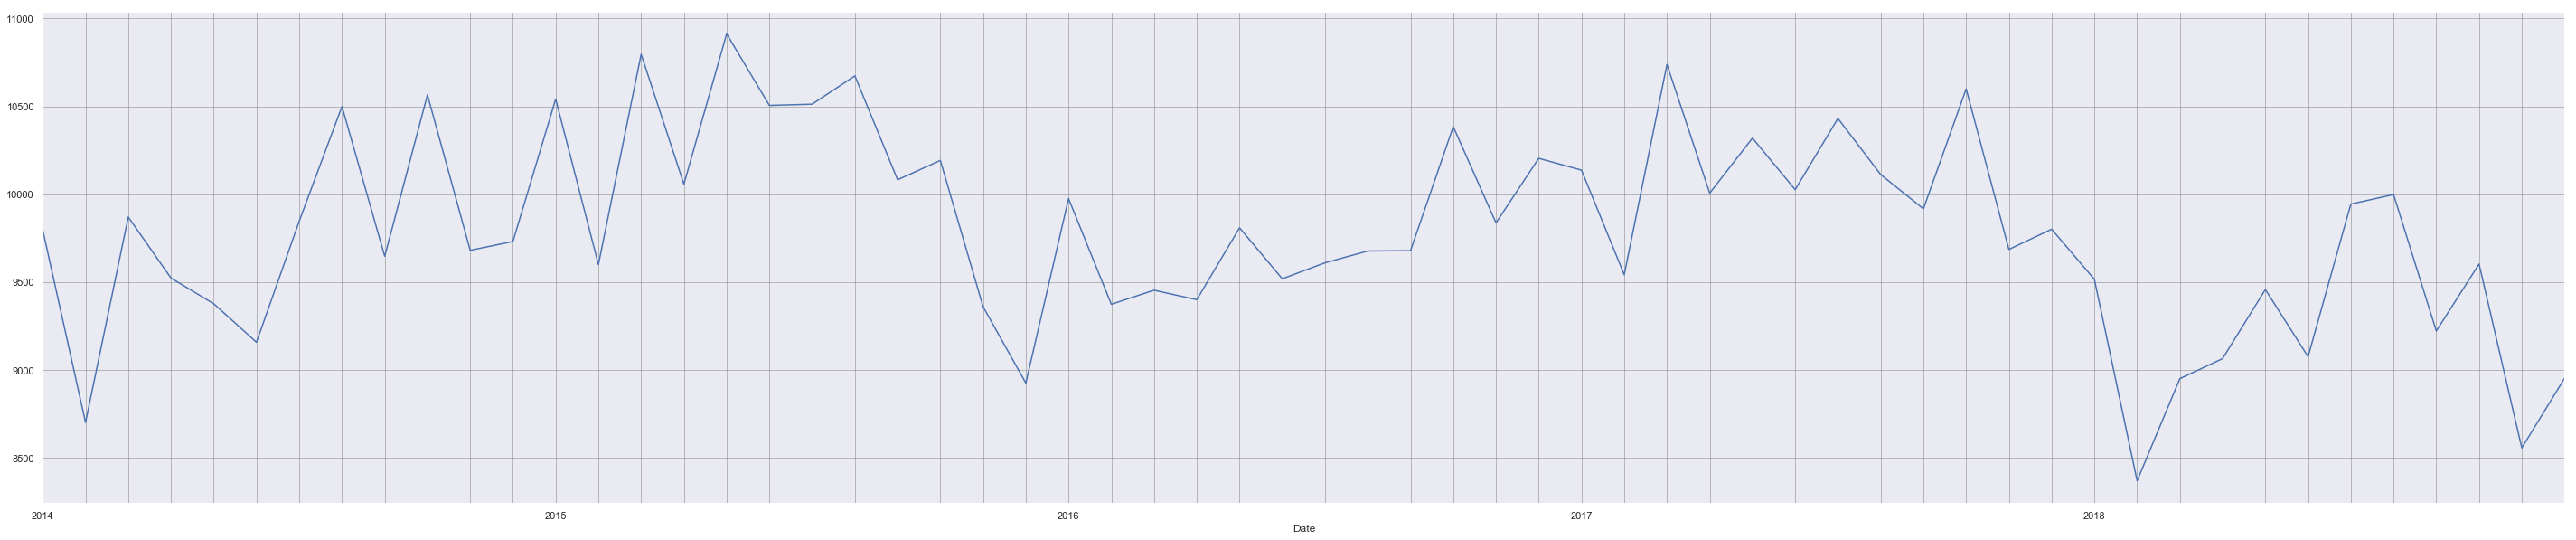

In [147]:
plt.figure(figsize=(50, 10))
p0_year_month_2014['Count'].plot()
plt.xticks(p0_year_month_2014.index)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()

In [148]:
# To combine the temperature and crime data set
p0_temp = pd.concat([p0_year_month_2014, sf_temp_index], axis=1)
p0_temp.head(3)

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,TAVG,year,month
2014-01,205923.0,47695.0,66491.0,1383280061209,506553.0,-1.199261e+06,369977.807458,9796,54.193548,2014,1
2014-02,181951.0,42487.0,59236.0,1228663334251,449730.0,-1.065327e+06,328657.820175,8702,54.035714,2014,2
2014-03,208161.0,48176.0,66939.0,1400935264105,508991.0,-1.208321e+06,372773.519194,9870,57.870968,2014,3


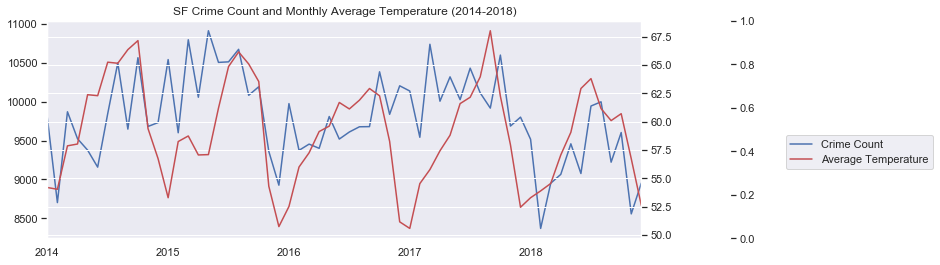

In [156]:
# To plot the temperature and crime count by year_month
fig, ax = plt.subplots()
ax1 = ax.twinx()
rspine = ax1.spines['right']
rspine.set_position(('axes', 1.15))
ax1.set_frame_on(True)
ax1.patch.set_visible(False)
fig.subplots_adjust(right=1.5)

p0_temp['Count'].plot(ax=ax, style='b-', label='Crime Count')
p0_temp['TAVG'].plot(ax=ax, style='r-', secondary_y=True, label='Average Temperature')
ax1.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]], ['Crime Count','Average Temperature'], 
           bbox_to_anchor=(1.5, 0.5))
plt.xticks(p0_temp.index)
ax1.grid()
plt.title('SF Crime Count and Monthly Average Temperature (2014-2018)')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/13. SF Crime Count and Monthly Average Temperature (2014-2018).jpeg', bbox_inches = "tight")
plt.show()

## Based on the graph above, we observed that in general, whenever the temperature peaks, the number of crimes would also reached the highest level.

In [157]:
# To calculate the correlation coefficient
p0_temp.corr()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,TAVG,year,month
Analysis Neighborhoods,1.000000,0.968080,0.986968,0.164556,0.980590,-0.988387,0.988384,0.926223,0.271845,-0.455611,0.044371
Current Police Districts,0.968080,1.000000,0.967870,0.168723,0.979789,-0.981638,0.981610,0.943549,0.231901,-0.459597,-0.026755
Current Supervisor Districts,0.986968,0.967870,1.000000,0.106741,0.975573,-0.985728,0.985713,0.918264,0.324193,-0.509809,0.001518
IncidntNum,0.164556,0.168723,0.106741,1.000000,0.204673,-0.215990,0.216136,0.397115,0.027546,0.784806,0.043308
SF Find Neighborhoods,0.980590,0.979789,0.975573,0.204673,1.000000,-0.991545,0.991551,0.950022,0.292588,-0.428573,0.037229
X,-0.988387,-0.981638,-0.985728,-0.215990,-0.991545,1.000000,-1.000000,-0.962257,-0.303508,0.424822,-0.022363
Y,0.988384,0.981610,0.985713,0.216136,0.991551,-1.000000,1.000000,0.962297,0.303592,-0.424696,0.022494
Count,0.926223,0.943549,0.918264,0.397115,0.950022,-0.962257,0.962297,1.000000,0.329743,-0.253793,0.027581
TAVG,0.271845,0.231901,0.324193,0.027546,0.292588,-0.303508,0.303592,0.329743,1.000000,-0.188539,0.300574
year,-0.455611,-0.459597,-0.509809,0.784806,-0.428573,0.424822,-0.424696,-0.253793,-0.188539,1.000000,0.000000


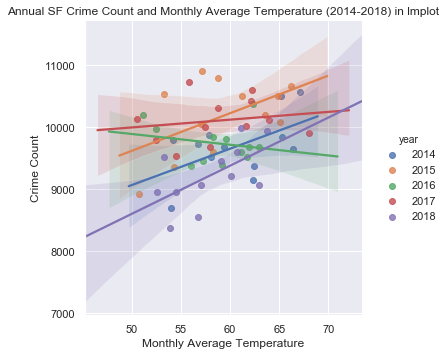

In [159]:
sns.lmplot(x='TAVG', y='Count', data=p0_temp, hue='year')
plt.xlabel('Monthly Average Temperature')
plt.ylabel('Crime Count')
plt.title('Annual SF Crime Count and Monthly Average Temperature (2014-2018) in lmplot')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/14. Annual SF Crime Count and Monthly Average Temperature (2014-2018) in lmplot.jpeg', bbox_inches = "tight")
plt.show()

# Based on the chart above, we can see that in most years, the number of crimes shows a positive correlation with temperature except for the year 2016.

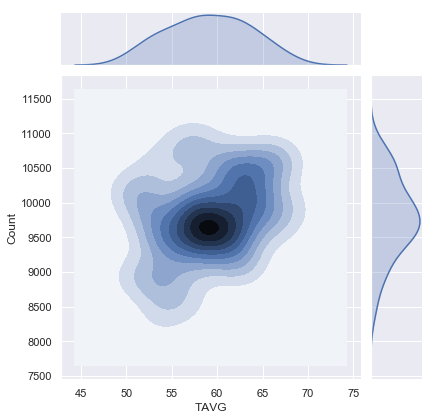

In [160]:
sns.jointplot(x='TAVG', y='Count', data=p0_temp, kind='kde')

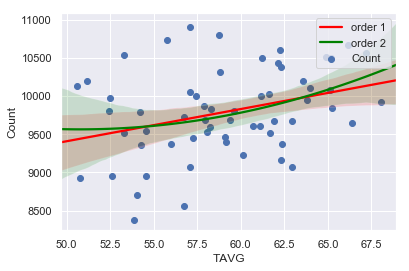

In [161]:
plt.scatter(p0_temp['TAVG'], p0_temp['Count'])
sns.regplot(x='TAVG', y='Count', data=p0_temp, color='red', label='order 1', scatter=None)
sns.regplot(x='TAVG', y='Count', data=p0_temp, color='green', order=2, label='order 2', scatter=None)

plt.legend(loc='upper right')
plt.show()

# 5.2 SF Crime Count and Unemployment Rate from 2003 to 2018 (Data source: https://fred.stlouisfed.org/series/CASANF0URN)

In [162]:
sf_u = pd.read_csv('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/datasets/other/sf_unemployment_rate.csv',parse_dates=['DATE'], index_col='DATE')
sf_u.head(3)

,CASANF0URN
DATE,
1990-01-01,3.7
1990-02-01,3.4
1990-03-01,3.2


In [163]:
# To calculate the average unemployment rate by year
sf_u_year = sf_u.resample('Y').mean()
sf_u_year.head(3)

,CASANF0URN
DATE,
1990-12-31,3.775000
1991-12-31,5.308333
1992-12-31,6.791667


In [164]:
# To filter the data set from 2003 to 2018
sf_u_year = sf_u_year.loc[(sf_u_year.index > '2003') & (sf_u_year.index < '2019-12')]
sf_u_year.head(3)

,CASANF0URN
DATE,
2003-12-31,6.666667
2004-12-31,5.758333
2005-12-31,4.983333


In [165]:
# To add a column by extracting year from "DATE" column
sf_u_year['year'] = pd.to_datetime(sf_u_year.index).to_period('Y')
sf_u_year.head(3)

,CASANF0URN,year
DATE,,
2003-12-31,6.666667,2003
2004-12-31,5.758333,2004
2005-12-31,4.983333,2005


In [166]:
# To set year column as index
sf_u_year_index = sf_u_year.set_index('year')

In [167]:
# To combine unemployment rate and crime data sets
p0_u = pd.concat([p0_year, sf_u_year_index], axis=1)
p0_u.head(3)

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,CASANF0URN
2003,2583316.0,581364.0,803286.0,3718046288065,6307884.0,-1.455509e+07,4.491291e+06,118892,6.666667
2004,2552194.0,576286.0,790480.0,4823687390326,6225989.0,-1.435263e+07,4.429018e+06,117238,5.758333
2005,2555102.0,569160.0,788980.0,5942515078032,6182141.0,-1.424470e+07,4.397596e+06,116357,4.983333


In [168]:
# To calculate correlation coefficient
p0_u.corr()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,CASANF0URN
Analysis Neighborhoods,1.000000,0.968591,0.971305,-0.182664,0.969543,-0.962390,0.962499,0.890669,-0.389468
Current Police Districts,0.968591,1.000000,0.982589,-0.049453,0.986653,-0.992119,0.992193,0.959852,-0.511219
Current Supervisor Districts,0.971305,0.982589,1.000000,0.011445,0.977144,-0.990398,0.990206,0.933737,-0.491098
IncidntNum,-0.182664,-0.049453,0.011445,1.000000,-0.097800,-0.026798,0.025385,0.129261,-0.526275
SF Find Neighborhoods,0.969543,0.986653,0.977144,-0.097800,1.000000,-0.984583,0.984792,0.941965,-0.493000
X,-0.962390,-0.992119,-0.990398,-0.026798,-0.984583,1.000000,-0.999995,-0.969354,0.544754
Y,0.962499,0.992193,0.990206,0.025385,0.984792,-0.999995,1.000000,0.969413,-0.544480
Count,0.890669,0.959852,0.933737,0.129261,0.941965,-0.969354,0.969413,1.000000,-0.687726
CASANF0URN,-0.389468,-0.511219,-0.491098,-0.526275,-0.493000,0.544754,-0.544480,-0.687726,1.000000


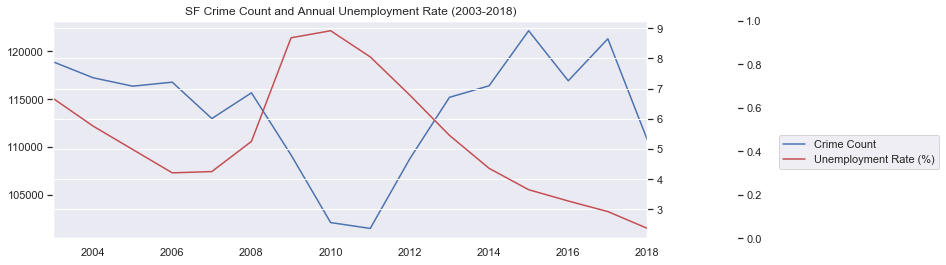

In [170]:
# To plot crime count and unemployment rate from 2003 to 2018
fig, ax = plt.subplots()
ax2 = ax.twinx()
rspine2 = ax2.spines['right']
rspine2.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=1.5)

p0_u['Count'].plot(ax=ax, style='b-')
p0_u['CASANF0URN'].plot(ax=ax, style='r-', secondary_y=True)
ax2.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]], ['Crime Count','Unemployment Rate (%)'], 
           bbox_to_anchor=(1.5, 0.5))
plt.xticks(p0_u.index)
plt.title('SF Crime Count and Annual Unemployment Rate (2003-2018)')
ax2.grid()
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/15. SF Crime Count and Annual Unemployment Rate (2003-2018).jpeg', bbox_inches = "tight")
plt.show()

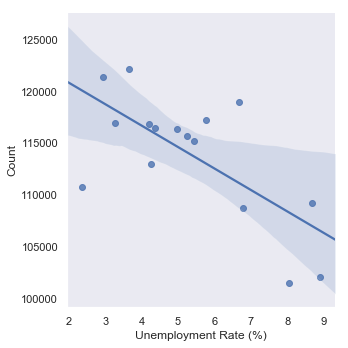

In [171]:
sns.lmplot(x='CASANF0URN', y='Count', data=p0_u)
plt.xlabel('Unemployment Rate (%)')
plt.grid()
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/16. Lmplot of SF Crime Count and Annual Unemployment Rate (2003-2018).jpeg', bbox_inches = "tight")
plt.show()

## The .corr show a result of -0.69. The plot shows that the unemployment rate is negatively correlated with the number of crimes each year. The higher the unemployment, the lower the number of crimes.
## 5.3 SF Crime Count and Homeless Population (2005-2017)
(Data source: https://sfgov.org/scorecards/safety-net/homeless-population)

In [172]:
hl = pd.read_csv('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/datasets/other/homeless_count.csv', index_col='Year', parse_dates=['Year'])
hl.head(3)

,Number
Year,
2005-12-31,6248
2006-12-31,6313
2007-12-31,6377


In [173]:
# To add a column by extracting year from "Year" column
hl['new'] = pd.to_datetime(hl.index).to_period('Y')
hl.head(3)

,Number,new
Year,,
2005-12-31,6248,2005
2006-12-31,6313,2006
2007-12-31,6377,2007


In [174]:
# To set year as the new index
hl_index = hl.set_index('new')
hl_index.head(3)

,Number
new,
2005,6248
2006,6313
2007,6377


In [175]:
# To filter the data set by "Date" from 2005 to 2017
p0_year_05 = p0_year.loc[(p0_year.index > '2004') & (p0_year.index < '2018')]
p0_year_05

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2005,2555102.0,569160.0,788980.0,5942515078032,6182141.0,-1.424470e+07,4.397596e+06,116357
2006,2565758.0,571201.0,801103.0,7174298276725,6275901.0,-1.429597e+07,4.410201e+06,116775
2007,2502558.0,552857.0,774661.0,8058907812783,5927228.0,-1.382984e+07,4.266467e+06,112968
2008,2552783.0,568034.0,786992.0,9409450286366,6037071.0,-1.415956e+07,4.368166e+06,115661
2009,2412539.0,535905.0,745888.0,9991918942043,5701526.0,-1.336357e+07,4.122615e+06,109159
2010,2235240.0,490191.0,698416.0,10373404351091,5340738.0,-1.249735e+07,3.855387e+06,102084
2011,2194602.0,494400.0,691842.0,11322129787421,5362768.0,-1.242276e+07,3.832367e+06,101474
2012,2321070.0,532775.0,741488.0,13247310318911,5713925.0,-1.331587e+07,4.107915e+06,108769
2013,2473577.0,557579.0,787379.0,15200435863083,5945932.0,-1.410194e+07,4.350503e+06,115190


In [176]:
# To combine the homeless population and crime data sets
p0_hl = pd.concat([p0_year_05, hl_index], axis=1)
p0_hl

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,Number
2005,2555102.0,569160.0,788980.0,5942515078032,6182141.0,-1.424470e+07,4.397596e+06,116357,6248
2006,2565758.0,571201.0,801103.0,7174298276725,6275901.0,-1.429597e+07,4.410201e+06,116775,6313
2007,2502558.0,552857.0,774661.0,8058907812783,5927228.0,-1.382984e+07,4.266467e+06,112968,6377
2008,2552783.0,568034.0,786992.0,9409450286366,6037071.0,-1.415956e+07,4.368166e+06,115661,6446
2009,2412539.0,535905.0,745888.0,9991918942043,5701526.0,-1.336357e+07,4.122615e+06,109159,6514
2010,2235240.0,490191.0,698416.0,10373404351091,5340738.0,-1.249735e+07,3.855387e+06,102084,6485
2011,2194602.0,494400.0,691842.0,11322129787421,5362768.0,-1.242276e+07,3.832367e+06,101474,6455
2012,2321070.0,532775.0,741488.0,13247310318911,5713925.0,-1.331587e+07,4.107915e+06,108769,6903
2013,2473577.0,557579.0,787379.0,15200435863083,5945932.0,-1.410194e+07,4.350503e+06,115190,7350
2014,2484590.0,564822.0,796281.0,16516792408234,6061146.0,-1.424957e+07,4.396133e+06,116396,7445


In [177]:
from scipy.stats import pearsonr
print('Calculate the Pearson r and p-value:', pearsonr(p0_hl['Count'], p0_hl['Number']))

Calculate the Pearson r and p-value: (0.5329438543886893, 0.06074983403230741)


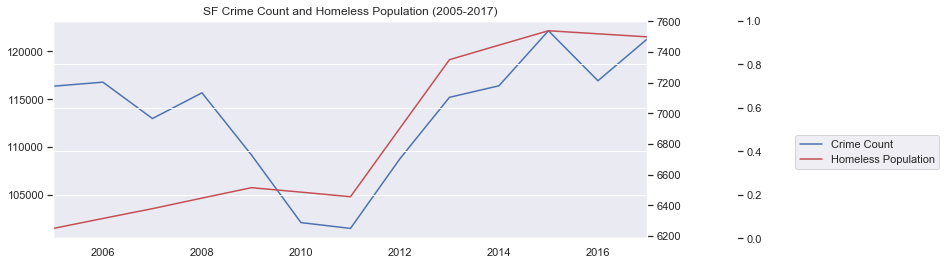

In [178]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine3 = ax3.spines['right']
rspine3.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=1.5)

p0_hl['Count'].plot(ax=ax, style='b-')
p0_hl['Number'].plot(ax=ax, style='r-', secondary_y=True)
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]], ['Crime Count','Homeless Population'], 
           bbox_to_anchor=(1.5, 0.5))
plt.xticks(p0_hl.index)
plt.title('SF Crime Count and Homeless Population (2005-2017)')
plt.grid()
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/17. SF Crime Count and Homeless Population (2005-2017).jpeg', bbox_inches = "tight")
plt.show()

In [179]:
# To filter the above combined data set from 2008 to 2018
p0_year_00 = p0_hl.loc[(p0_hl.index > '2008') & (p0_hl.index < '2018')]
p0_year_00

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,Number
2009,2412539.0,535905.0,745888.0,9991918942043,5701526.0,-1.336357e+07,4.122615e+06,109159,6514
2010,2235240.0,490191.0,698416.0,10373404351091,5340738.0,-1.249735e+07,3.855387e+06,102084,6485
2011,2194602.0,494400.0,691842.0,11322129787421,5362768.0,-1.242276e+07,3.832367e+06,101474,6455
2012,2321070.0,532775.0,741488.0,13247310318911,5713925.0,-1.331587e+07,4.107915e+06,108769,6903
2013,2473577.0,557579.0,787379.0,15200435863083,5945932.0,-1.410194e+07,4.350503e+06,115190,7350
2014,2484590.0,564822.0,796281.0,16516792408234,6061146.0,-1.424957e+07,4.396133e+06,116396,7445
2015,2618610.0,598027.0,836283.0,18550541035152,6404828.0,-1.495478e+07,4.613734e+06,122156,7539
2016,2505840.0,565701.0,797125.0,18934512828281,6122345.0,-1.431404e+07,4.416079e+06,116922,7519
2017,2605872.0,583130.0,821727.0,20882716926179,6330950.0,-1.485177e+07,4.581987e+06,121314,7499


In [180]:
# To calculate the correlation coefficient
p0_year_00.corr()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,Number
Analysis Neighborhoods,1.000000,0.981799,0.986689,0.855795,0.980708,-0.987385,0.987378,0.987387,0.882701
Current Police Districts,0.981799,1.000000,0.994198,0.870044,0.992754,-0.992974,0.992962,0.992975,0.914487
Current Supervisor Districts,0.986689,0.994198,1.000000,0.893186,0.993902,-0.998740,0.998737,0.998741,0.938876
IncidntNum,0.855795,0.870044,0.893186,1.000000,0.917609,-0.906658,0.906716,0.906648,0.942049
SF Find Neighborhoods,0.980708,0.992754,0.993902,0.917609,1.000000,-0.996136,0.996141,0.996134,0.931374
X,-0.987385,-0.992974,-0.998740,-0.906658,-0.996136,1.000000,-1.000000,-1.000000,-0.938824
Y,0.987378,0.992962,0.998737,0.906716,0.996141,-1.000000,1.000000,1.000000,0.938854
Count,0.987387,0.992975,0.998741,0.906648,0.996134,-1.000000,1.000000,1.000000,0.938824
Number,0.882701,0.914487,0.938876,0.942049,0.931374,-0.938824,0.938854,0.938824,1.000000


## The homeless data was available every other year starting from 2005. Therefore, we use the mean of the previous and next year for estimate of the current year, that is 2006, 2008 till 2016. From the graph above, we found that starting from 2009, the number of crimes is positively related with the homeless population, which is further supported by the correlation efficiency of 0.94.
## 5.3 SF Crime Count and Economy (2006-2018)
(Data source:

http://worldpopulationreview.com/us-cities/san-francisco-population/

https://www.deptofnumbers.com/income/california/san-francisco/



In [181]:
sf_eco = pd.read_csv('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/datasets/other/sf_eco.csv', index_col='Year', parse_dates=['Year'])
sf_eco

,Population,Median_household_income,GDP_per_capita
Year,,,
2006-01-01,751431,85878,78850
2007-01-01,758348,87205,81024
2008-01-01,767067,87708,82105
2009-01-01,774347,84552,77002
2010-01-01,805550,82281,74107
2011-01-01,815677,78617,73032
2012-01-01,829027,80138,75658
2013-01-01,839841,83924,77352
2014-01-01,851116,86256,80098


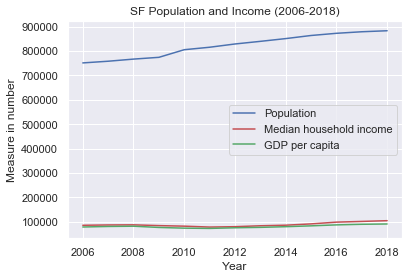

In [183]:
plt.plot(sf_eco.index, sf_eco['Population'], color='b', label='Population')
plt.plot(sf_eco.index, sf_eco['Median_household_income'], color='r', label='Median household income')
plt.plot(sf_eco.index, sf_eco['GDP_per_capita'], color='g', label='GDP per capita')
plt.legend(loc='center right')
plt.xlabel('Year')
plt.ylabel('Measure in number')
plt.title('SF Population and Income (2006-2018)')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/18. SF Population and Income (2006-2018).jpeg', bbox_inches = "tight")
plt.show()

## As to population, it shows a steady increase over the years. Therefore, it's easy to tell that it's irrelavant to our analysis, and should be dropped.

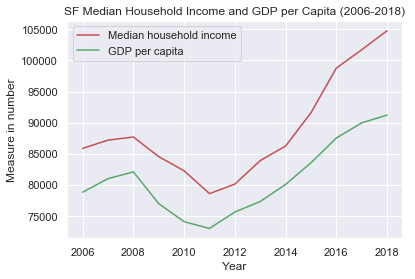

In [184]:
plt.plot(sf_eco.index, sf_eco['Median_household_income'], color='r', label='Median household income')
plt.plot(sf_eco.index, sf_eco['GDP_per_capita'], color='g', label='GDP per capita')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Measure in number')
plt.title('SF Median Household Income and GDP per Capita (2006-2018)')
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/19. SF Median Household Income and GDP per Capita (2006-2018).jpeg', bbox_inches = "tight")
plt.show()

## A closer look at the income and GDP data, we can tell that the chart above shows that the trend of median household income is very close to GDP per capita. Therefore, we choose one of them for analysis.

In [185]:
# To drop the columns that won't be used in our analysis
sf_eco.drop(['Population', 'GDP_per_capita'], axis=1, inplace=True)
sf_eco.head(3)

,Median_household_income
Year,
2006-01-01,85878
2007-01-01,87205
2008-01-01,87708


In [186]:
# To add a column by extracting year from "Year" column
sf_eco['year'] = pd.to_datetime(sf_eco.index).to_period('Y')
sf_eco.head(3)

,Median_household_income,year
Year,,
2006-01-01,85878,2006
2007-01-01,87205,2007
2008-01-01,87708,2008


In [187]:
# To set year as index
sf_eco_index = sf_eco.set_index('year')
sf_eco_index.head(3)

,Median_household_income
year,
2006,85878
2007,87205
2008,87708


In [188]:
# To filter data set by "Date" column from 2005 to 2018
p0_06 = p0_year.loc[(p0_year.index > '2005')]
p0_06.head(3)

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count
Date,,,,,,,,
2006,2565758.0,571201.0,801103.0,7174298276725,6275901.0,-1.429597e+07,4.410201e+06,116775
2007,2502558.0,552857.0,774661.0,8058907812783,5927228.0,-1.382984e+07,4.266467e+06,112968
2008,2552783.0,568034.0,786992.0,9409450286366,6037071.0,-1.415956e+07,4.368166e+06,115661


In [189]:
# To combine the income and crime data sets by year
p0_income = pd.concat([p0_06, sf_eco_index], axis=1)
p0_income

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,Median_household_income
2006,2565758.0,571201.0,801103.0,7174298276725,6275901.0,-1.429597e+07,4.410201e+06,116775,85878
2007,2502558.0,552857.0,774661.0,8058907812783,5927228.0,-1.382984e+07,4.266467e+06,112968,87205
2008,2552783.0,568034.0,786992.0,9409450286366,6037071.0,-1.415956e+07,4.368166e+06,115661,87708
2009,2412539.0,535905.0,745888.0,9991918942043,5701526.0,-1.336357e+07,4.122615e+06,109159,84552
2010,2235240.0,490191.0,698416.0,10373404351091,5340738.0,-1.249735e+07,3.855387e+06,102084,82281
2011,2194602.0,494400.0,691842.0,11322129787421,5362768.0,-1.242276e+07,3.832367e+06,101474,78617
2012,2321070.0,532775.0,741488.0,13247310318911,5713925.0,-1.331587e+07,4.107915e+06,108769,80138
2013,2473577.0,557579.0,787379.0,15200435863083,5945932.0,-1.410194e+07,4.350503e+06,115190,83924
2014,2484590.0,564822.0,796281.0,16516792408234,6061146.0,-1.424957e+07,4.396133e+06,116396,86256
2015,2618610.0,598027.0,836283.0,18550541035152,6404828.0,-1.495478e+07,4.613734e+06,122156,91588


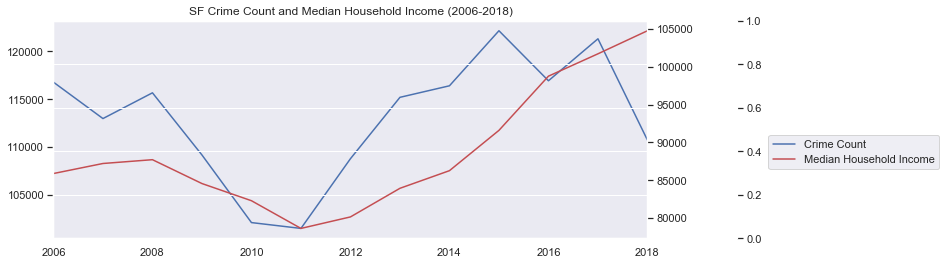

In [191]:
fig, ax = plt.subplots()
ax4 = ax.twinx()
rspine4 = ax4.spines['right']
rspine4.set_position(('axes', 1.15))
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
fig.subplots_adjust(right=1.5)

p0_income['Count'].plot(ax=ax, style='b-')
p0_income['Median_household_income'].plot(ax=ax, style='r-', secondary_y=True)
ax4.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]], ['Crime Count','Median Household Income'], 
           bbox_to_anchor=(1.5, 0.5))
plt.xticks(p0_income.index)
plt.title('SF Crime Count and Median Household Income (2006-2018)')
plt.grid()
plt.savefig('/Users/wanranli/Downloads/!Capstone Project 1/SF_crime/pics/20. SF Crime Count and Median Household Income (2006-2018).jpeg', bbox_inches = "tight")
plt.show()

In [192]:
# To calculate correlation coefficient
p0_income.corr()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,Median_household_income
Analysis Neighborhoods,1.000000,0.965322,0.975657,0.064103,0.966199,-0.959590,0.959476,0.880038,0.196725
Current Police Districts,0.965322,1.000000,0.988005,0.250640,0.985897,-0.992275,0.992245,0.956718,0.308582
Current Supervisor Districts,0.975657,0.988005,1.000000,0.232954,0.987959,-0.992273,0.992228,0.930071,0.251611
IncidntNum,0.064103,0.250640,0.232954,1.000000,0.225098,-0.318366,0.318796,0.448956,0.728570
SF Find Neighborhoods,0.966199,0.985897,0.987959,0.225098,1.000000,-0.986678,0.986634,0.939275,0.299639
X,-0.959590,-0.992275,-0.992273,-0.318366,-0.986678,1.000000,-1.000000,-0.966142,-0.356387
Y,0.959476,0.992245,0.992228,0.318796,0.986634,-1.000000,1.000000,0.966229,0.356747
Count,0.880038,0.956718,0.930071,0.448956,0.939275,-0.966142,0.966229,1.000000,0.542340
Median_household_income,0.196725,0.308582,0.251611,0.728570,0.299639,-0.356387,0.356747,0.542340,1.000000


In [193]:
# To filter data by excluding 2018 and calculate the correlation coefficient
p0_income.loc[(p0_income.index < '2018')].corr()

,Analysis Neighborhoods,Current Police Districts,Current Supervisor Districts,IncidntNum,SF Find Neighborhoods,X,Y,Count,Median_household_income
Analysis Neighborhoods,1.000000,0.974312,0.970534,0.341984,0.966556,-0.968158,0.968092,0.968167,0.721580
Current Police Districts,0.974312,1.000000,0.992247,0.462789,0.984594,-0.991108,0.991076,0.991110,0.694385
Current Supervisor Districts,0.970534,0.992247,1.000000,0.510764,0.987419,-0.998026,0.998018,0.998029,0.728067
IncidntNum,0.341984,0.462789,0.510764,1.000000,0.460711,-0.539075,0.539360,0.539042,0.667458
SF Find Neighborhoods,0.966556,0.984594,0.987419,0.460711,1.000000,-0.985795,0.985765,0.985795,0.728405
X,-0.968158,-0.991108,-0.998026,-0.539075,-0.985795,1.000000,-1.000000,-1.000000,-0.753114
Y,0.968092,0.991076,0.998018,0.539360,0.985765,-1.000000,1.000000,1.000000,0.753247
Count,0.968167,0.991110,0.998029,0.539042,0.985795,-1.000000,1.000000,1.000000,0.753098
Median_household_income,0.721580,0.694385,0.728067,0.667458,0.728405,-0.753114,0.753247,0.753098,1.000000


## We observed that in general, the higher the median household income, the lower the number of crimes.